# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

Objective of this Kernel is to cover the basics of Python and its application in Data Science.We will be covering Following topics 

1.Data Vizualization 

2.Feature Engineeing 

3.Machine Learning Model Build 

4.Feature Importance 

5.Conclusion 

6.Miscellaneous
  
     a)Working with Strings 

     b)Printing Module Versions 

     c)Printing emojis

     d)Solving Linear Equation with Numpy 

     e)Pandas 

This kernel is work in process and I will be updating this is coming days.If you like my work please fo vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['train.csv', 'test.csv', 'gender_submission.csv']


# 1.Data Vizualization 

### Importing Dataset

In [2]:
import pandas as pd
data=pd.read_csv('../input/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Importing Python Modules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

### Missing Values 

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

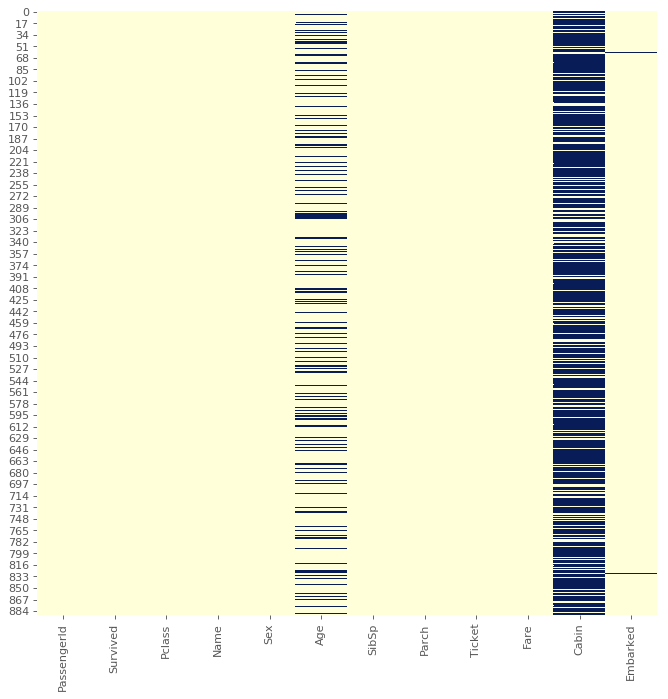

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

The features Cabin and Age have missing values as indicated by the above heatmap.We will impute the missing values in Age.

### Filing Age Missing Values 

We can fill the missing value with the mean of the Age column.This is because we can fill the age of a child (5 years)  with the mean age ( Around 30 years).This would increase the error in the data.But we can see that in the Name column we have titles like Mr,Mrs menioned.We have to get the mean age of each group in the titles and then replace the missing age with the mean values of the titles.

In [6]:
data['Title']=0
for i in data:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [7]:
pd.crosstab(data.Title,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In the dataset initials like Mlle or Mme stand for Miss.We will replace them with Miss.

In [8]:
data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [9]:
pd.crosstab(data.Title,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


We have converted the Titles in four categories like Master,Miss,Mr,Mrs and Other.

In [10]:
data.groupby('Title')['Age'].mean() #lets check the average age by Initials

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Now we have got the mean Age of the different groups in the Title.Now we can use this values to imput the missing values in the Age Column in our Titanic Dataset.

### Filing NaN Ages 

In [11]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Title=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Title=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Title=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Title=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Title=='Other'),'Age']=46

In [12]:
data.Age.isnull().any() #So no null values left finally 

False

Now we can see that there no Missing Values in the Age columns

### Filling Embarked NaN

We can see that the Embarked column has two missing values.In the dataset most people embarked Titanic from the port S.So we can replace the two missing value with S

In [13]:
data['Embarked'].fillna('S',inplace=True)

In [14]:
data.Embarked.isnull().any()# Finally No NaN values

False

## Heat Map

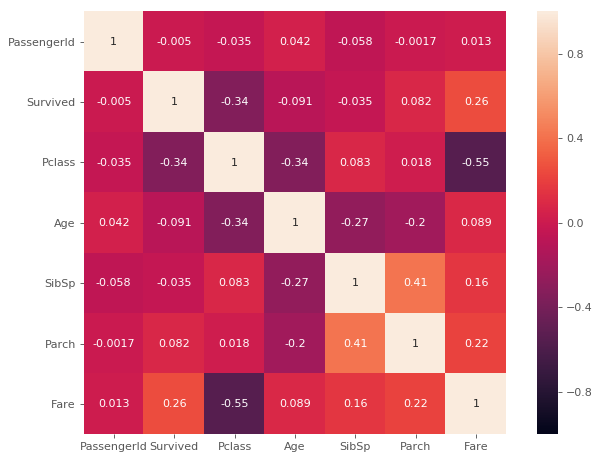

In [15]:
corrmat = data.corr()
fig = plt.figure(figsize = (10,7))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

In this dataset we have more we have more categorical Data.So heap map or correlation plot is not the correct method of find he correlation between features and Survived.

## Univariate Analysis

In [16]:
cols = data.columns
print(list(cols))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']


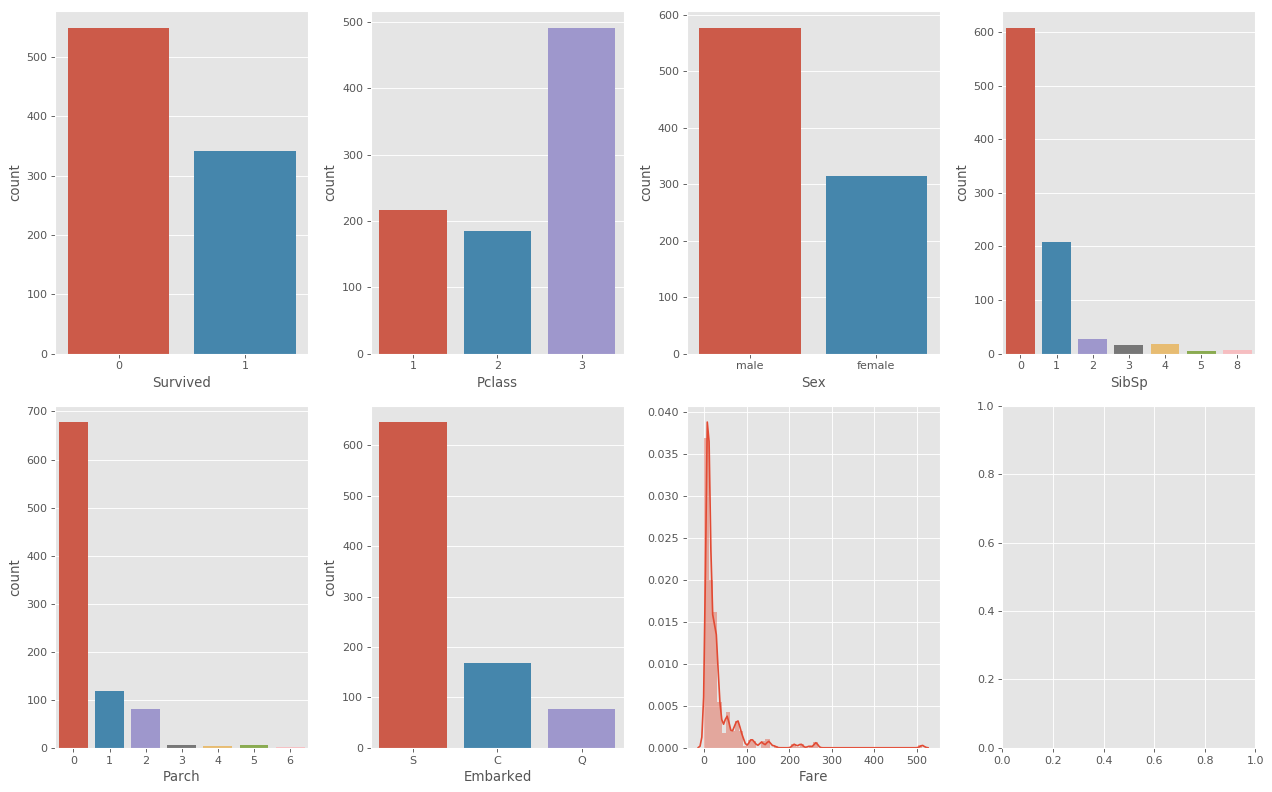

In [17]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Survived',data=data,ax=ax[0][0])
sns.countplot('Pclass',data=data,ax=ax[0][1])
sns.countplot('Sex',data=data,ax=ax[0][2])
sns.countplot('SibSp',data=data,ax=ax[0][3])
sns.countplot('Parch',data=data,ax=ax[1][0])
sns.countplot('Embarked',data=data,ax=ax[1][1])
sns.distplot(data['Fare'],kde=True,ax=ax[1][2])

plt.tight_layout()

For all categorical variables we have ploted the count plot and for the continous variables we have ploted the distplot.

1.More people died in the accident that the people who survived.

2.More people traveled in 3rd class

3.There were more male passengers than female on titanic

4.Most people were travelling alone on titanic some had siblings and parents as shown in the plots 

5.More people embarked from S- Southampton 

6.The fare for most people was less than 100. 

## Survived 

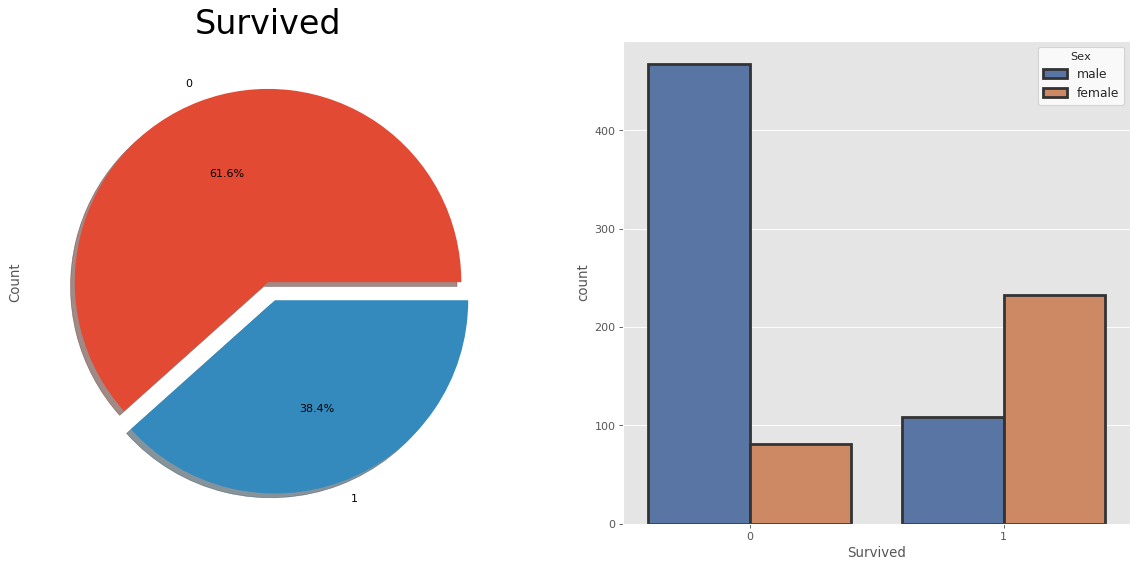

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Survived',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Survived',hue='Sex',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff() # This removes the matplotlib notifications

We can clearly see that 

1.Only 38.4 % people survived on Titaic 

2.More female Survived cmpared to male.This shows females were give more priority over males at the time of Rescue.

### Groupby and Countplot

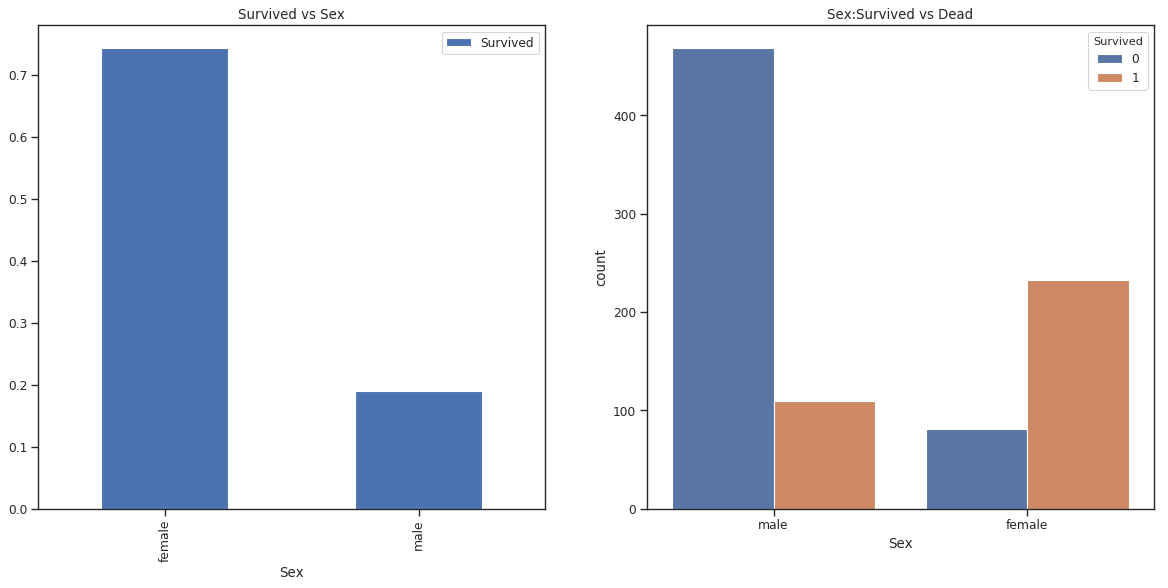

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

We can see that even though majority of people who travelled on Titanic were males more than 75% Women survived.Only around 18% males managed to survive on Titanic.

### Strip + Survived + Age Plot

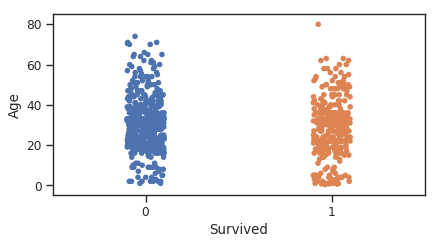

In [20]:
sns.stripplot(x="Survived", y="Age", data=data,jitter=True)
pass

## PCLASS

### Value counts 

In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most Passengers 491 travelled in third class

### Group By + Count

In [22]:
data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

We can clearly see that the ratio of Survival in different class was as follows 

1.First class = 63% 

2.Second class = 47% 

3.Third class = 24% 

We can clearly see that during rescue people from first class were given preference over second and third class passengers.Money can be deciding factor in case of survival.Sad but true.


### Count Plot 

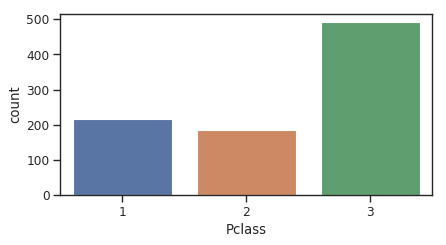

In [23]:
sns.countplot('Pclass',data=data)
pass

As we have mentioed before the above count plots shows that more people travelled in third class on the titanic.

### Countplot with Hue

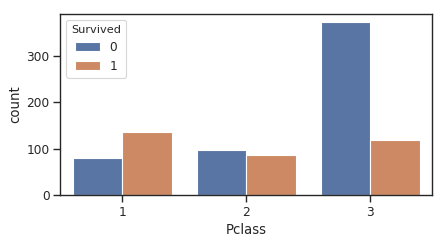

In [24]:
sns.countplot('Pclass',data=data,hue='Survived')
pass

Above count plot with Survived as hue again proves the point that if one travelled in the first class on Titanic then chances of ones survival was much more compared to a passenger in third class.

### Pie Plot + Value Counts

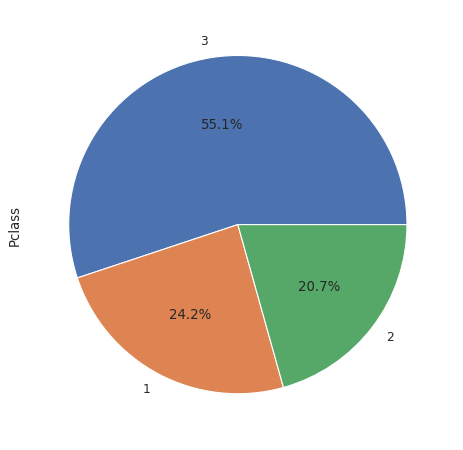

In [25]:
data['Pclass'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))
pass

We can cearly see from the Pie plot 55 % people travelled in third class,20.7 % in second class and 24.2% people travelled in first class.

### Catplot

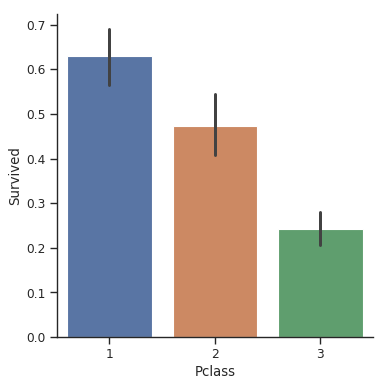

In [26]:
sns.catplot(x='Pclass',y='Survived',kind='bar',data=data)
pass

Catplot gives us the percentage of survival in differenc classes.Earlier I had calculated the survival rate manually.But with the help of catplot we can get the survival percentage directly from the plot.

### Pointplot

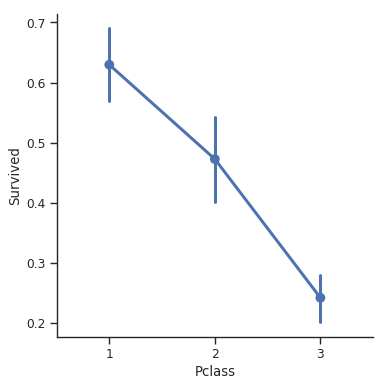

In [27]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=data)
pass

The catplot and the point plot are showing us the same information but the way of displaying is different.

### Cat + Point + Hue Plot

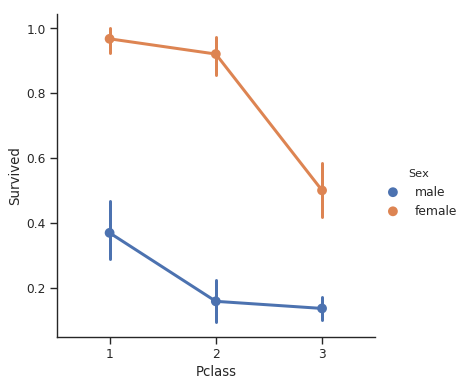

In [28]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=data,hue='Sex')
pass

This gives better representation of Survival in all the class based on sex.

### Violin Plot

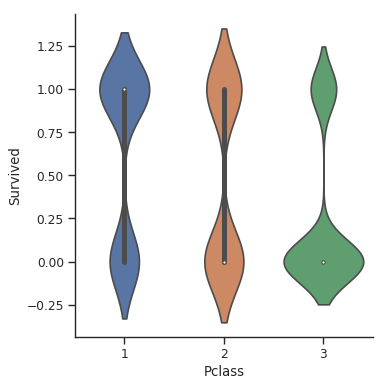

In [29]:
sns.catplot(x='Pclass',y='Survived',kind='violin',data=data)
pass

The larger bulb shape is at the bottom of passenger class 3 which indicated many passengers in class 3 died.

The larger bulb at the top is in the class 1 indicating more people survived in passenger class 1.

## Sex

### Value Counts 

In [30]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There were more Male than Females on Titaic

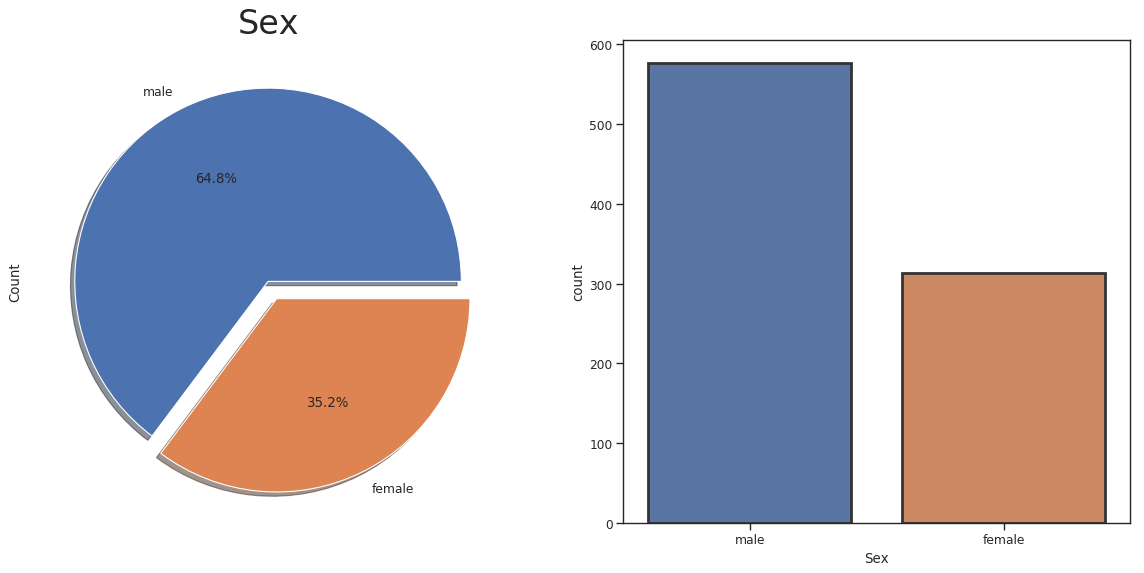

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Sex'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Sex',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Sex',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff() # This removes the matplotlib notifications

We can clearly see than 65% Passengers were males and 35 % were females.

### Groupby + Count Plot

In [32]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Percentage wise More women Surived than Men on Titanic.

### Count Plot 

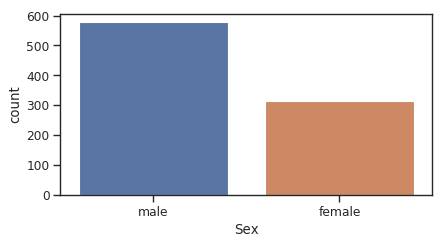

In [33]:
sns.countplot('Sex',data=data)
pass

The count plot clearly shows that more male travelled on Titanic compared to Females.

### Countplot + Hue

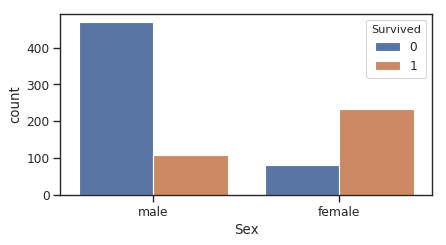

In [34]:
sns.countplot('Sex',data=data,hue='Survived')
pass

Plot clearly shows more women survived on Titanic

### Pie Plot + Value Counts

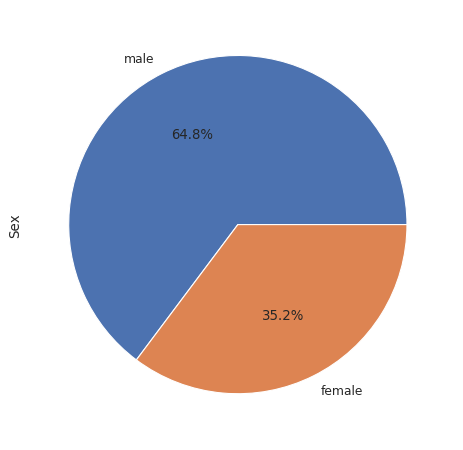

In [35]:
data['Sex'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))
pass

Now we have clearly got the percentage of Male and Female on Titanic.

### Cat + Sex + Survived + Bar 

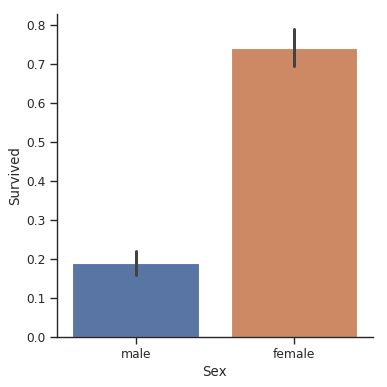

In [36]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data)
pass

Less than 20% Men survived.

More than 70% Women survived.

### Catplot + Sex + Survived + Bar + Pclass Hue Plot

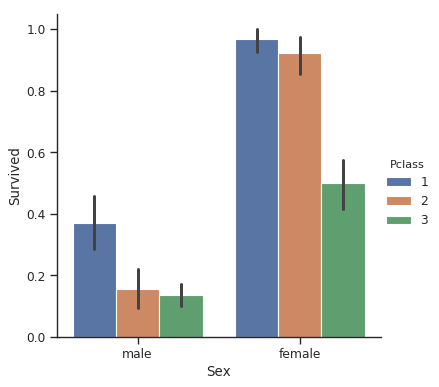

In [37]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data,hue='Pclass')
pass

Female in first and second class have almost same chance of survival.Survival rate for women in third class is around 50% much less than that in first and second class.

More male survived in first class still much lower than females in first class.for second and third class the survival rate for men is lower than 20%.

### Catp + Sex + Survived + Bar + Pclass Column Plot

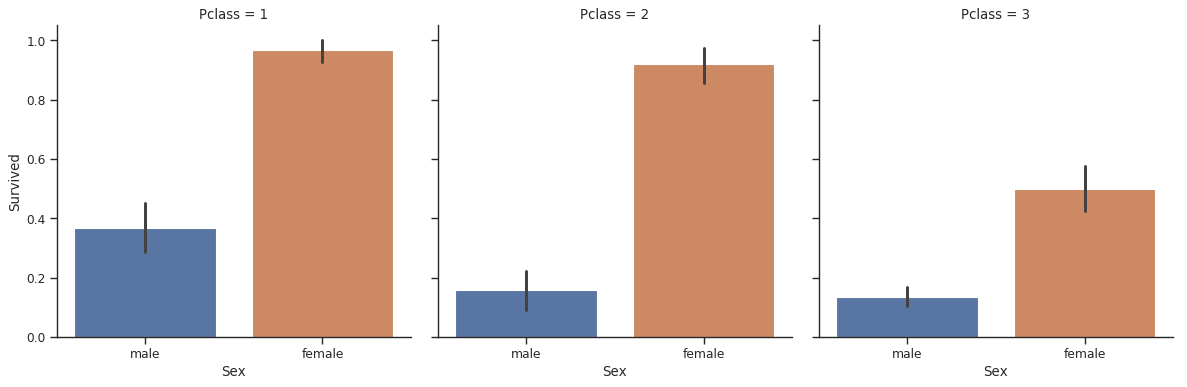

In [38]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data,col='Pclass')
pass

In this plot we have three information based on Sex,Survival Percentage and Class.

We can also plot this plots in row format by using **row='Pclass'** in the code.

### Catplot + Pclass + Survived + Bar + Sex Column Plot

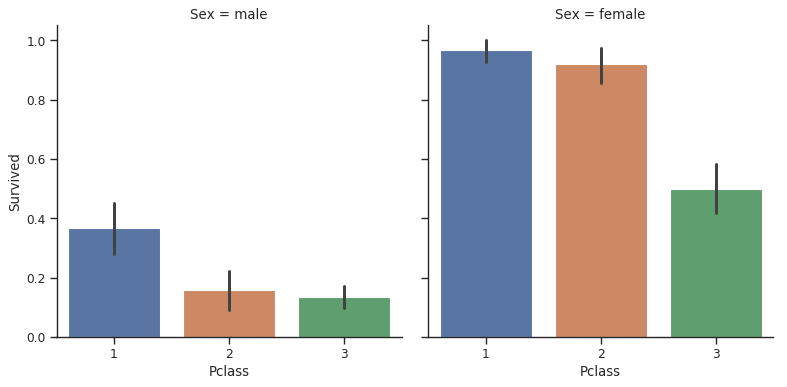

In [39]:
sns.catplot(x='Pclass',y='Survived',kind='bar',data=data,col='Sex')
pass

This plot is useful if we want to look at the survival in different class for Male and Female separately.

### Cat + Sex + Survived + Point Plot

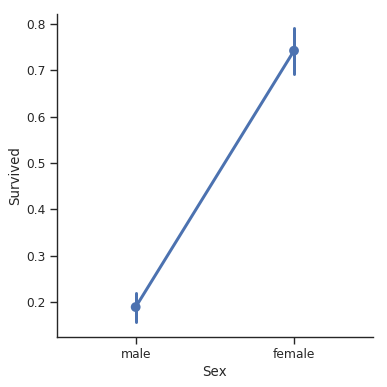

In [40]:
sns.catplot(x='Sex',y='Survived',kind='point',data=data)
pass

Cat + Point plot clearly shows the difference in the survival percentage for Males and Females.

### Cat + Sex + Survived + Point + Pclass Hue Plot

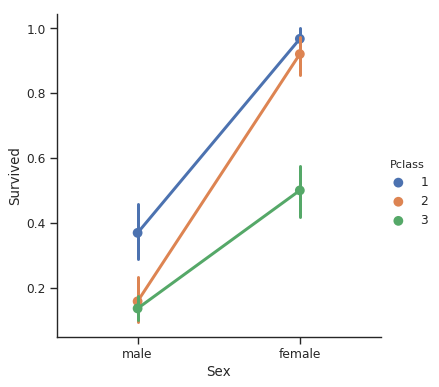

In [41]:
sns.catplot(x='Sex',y='Survived',kind='point',data=data,hue='Pclass')
pass

We can see that for second class more percentage of male died compared to female.The slope of the lines are indicator of the difference in survival rate of passangers in same class based on sex.

### Cat + Sex + Survived + Violin Plot

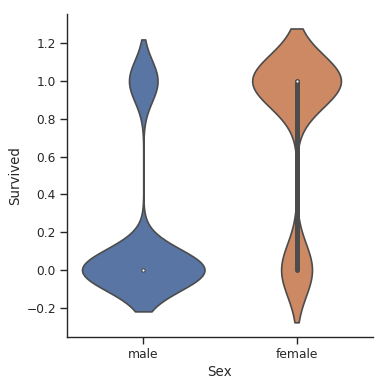

In [42]:
sns.catplot(x='Sex',y='Survived',kind='violin',data=data)
pass

### Cat + Sex + Survived + Violin + Pclass Hue Plot

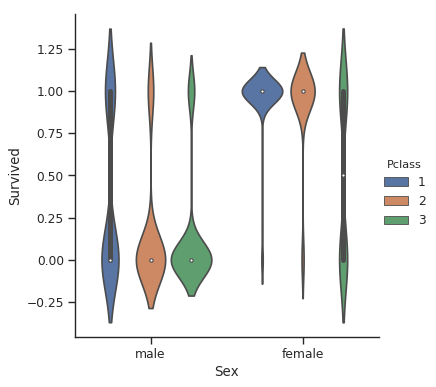

In [43]:
sns.catplot(x='Sex',y='Survived',kind='violin',data=data,hue='Pclass')
pass

So same thik can be projected with Violin Plot

### Cat + Sex + Survived + Violin + Pclass Column Plot

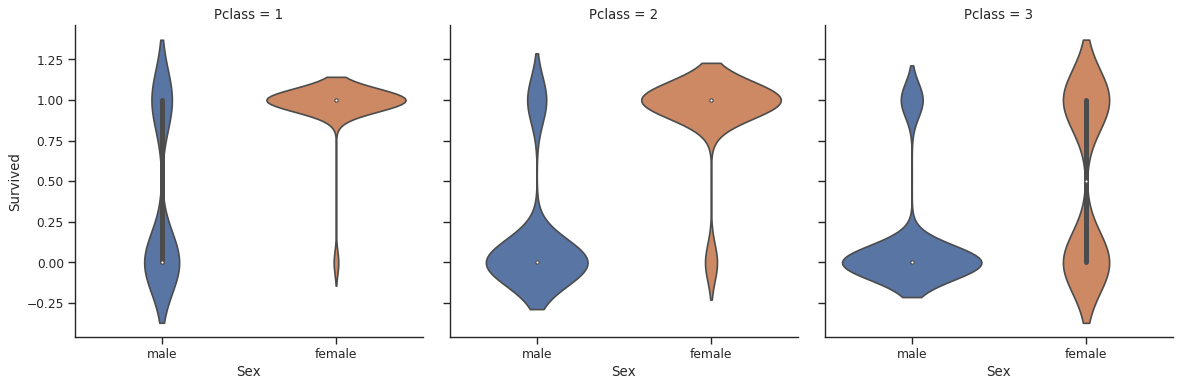

In [44]:
sns.catplot(x='Sex',y='Survived',kind='violin',data=data,col='Pclass')
pass

Now this violin plot based on Class and sex is clearly availabe to us.

## Fare

In [45]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


### Histogram

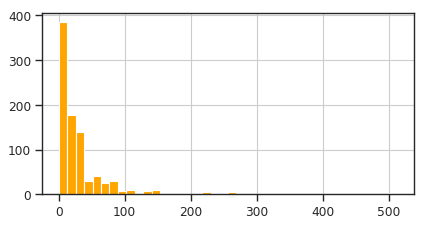

In [46]:
data['Fare'].hist(bins=40,color='orange')
pass

We can see that fare for most people was less than 40 $

### Distribution plot

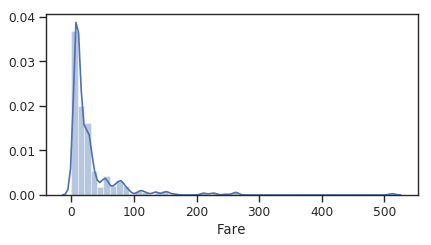

In [47]:
sns.distplot(data['Fare'])
plt.xlabel('Fare')
plt.show()
pass

### KDE Plot

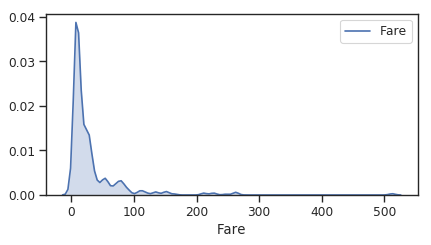

In [48]:
sns.kdeplot(data['Fare'],shade=True)
plt.xlabel('Fare')
plt.show()
pass

### Classwise Fare Distribution 

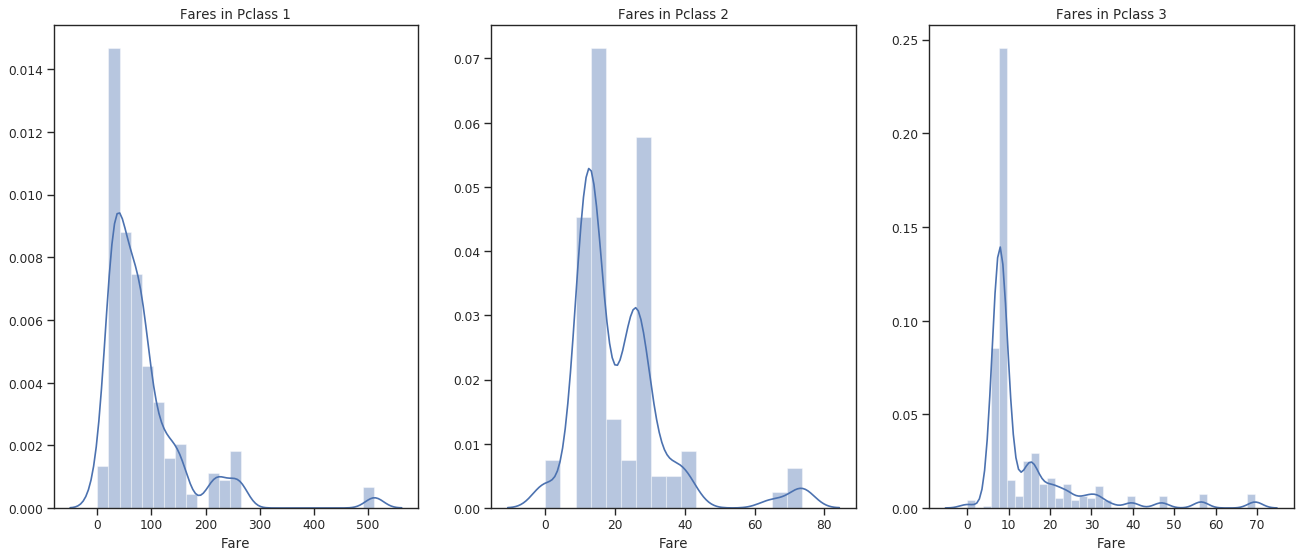

In [49]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

1.We can see the distribution of fare was higher in 1st class from 0-300 dollars and some people even paid 500 dollars.

2.For 2nd class the distrubution of fare is more between 0-40 dollars and there are some passangers who paid in the reange 60-80 dollars.

3.Most passangers in 3rd class paid between 0-30 dollars for few people fare was higher reaching upto 70 dollars.

### Cat + Sex + Fare + Box Plot

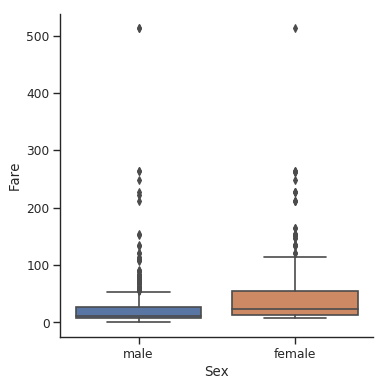

In [50]:
sns.catplot(x='Sex',y='Fare',data=data,kind='box')
pass

From the box plot we can conclude the mean fare paid by Females was more than males on Titanic.This could be beause more men travlled in 3rd class compared to women.

### Cat + Sex + Fare + Boxplot + Pclass Hue Plot

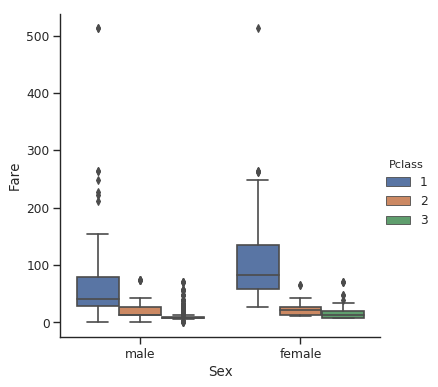

In [51]:
sns.catplot(x='Sex',y='Fare',data=data,kind='box',hue='Pclass')
pass

Surprisingly we can see that mean fare for women in 1st class is much more than for men.

### Cat + Sex + Fare + Box + Pclass Column Plot

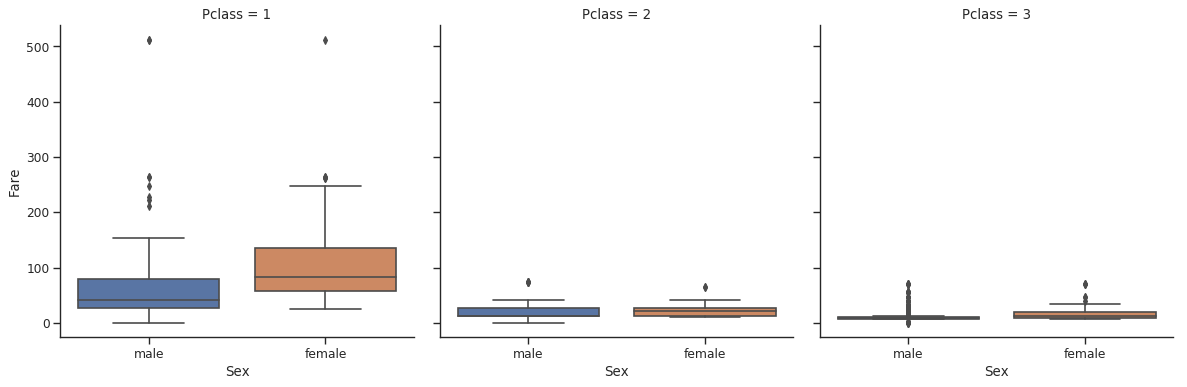

In [52]:
sns.catplot(x='Sex',y='Fare',data=data,kind='box',col='Pclass')
pass

So now we can clearly see that women were charged more than men in the first class.What could be the reason may be they were offered some additional service.

For second class it seems the fare for Male and Female were almost same.

For the third class we can see that the fare for female was slighly more than male.Gender bias? Not sure

### Cat + Sex + Fare + Boxen + Pclass Column Plot

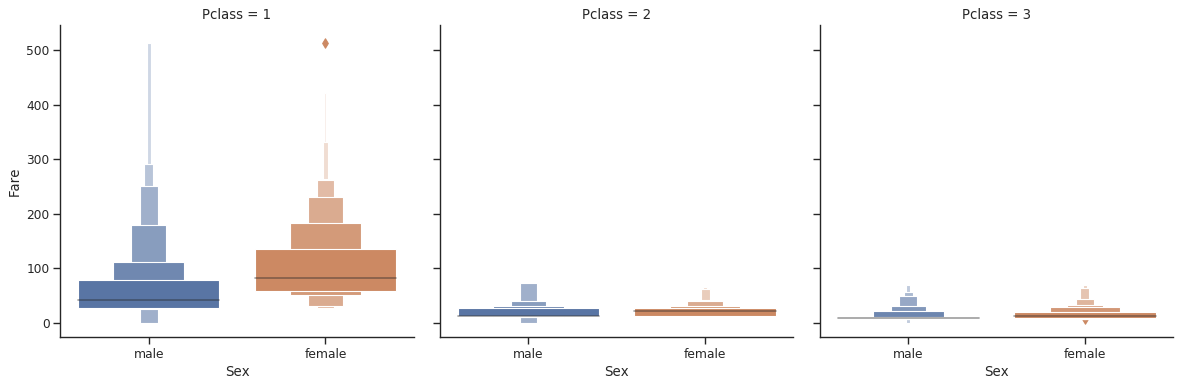

In [53]:
sns.catplot(x='Sex',y='Fare',data=data,kind='boxen',col='Pclass')
pass

Boxen plot are more cool than Box plot

### Cat + Pclass + Fare + Swarm + Sex Column Plot

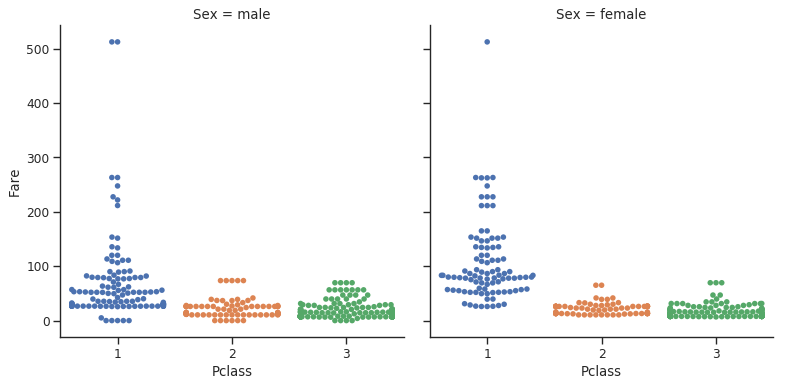

In [54]:
sns.catplot(x='Pclass',y='Fare',data=data,kind='swarm',col='Sex')
pass

### Catplot + Survived + Fare + Swarm + Sex Column

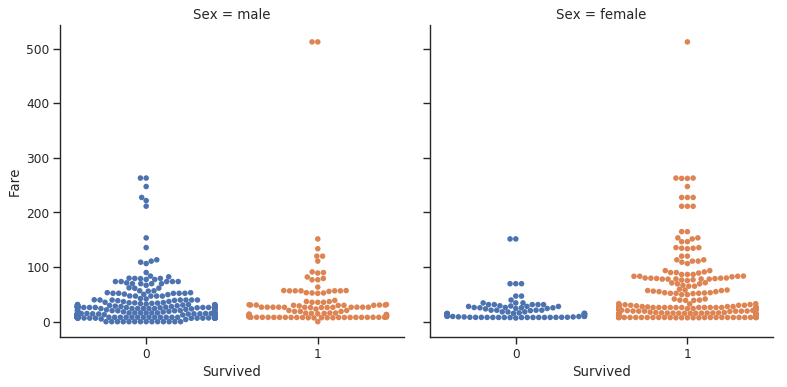

In [55]:
sns.catplot(x='Survived',y='Fare',data=data,kind='swarm',col='Sex')
pass

We can see that fare for women was higher and their survival rate was higher.

### Cat + Survived + Fare + Swarm + Pclass Column Plot

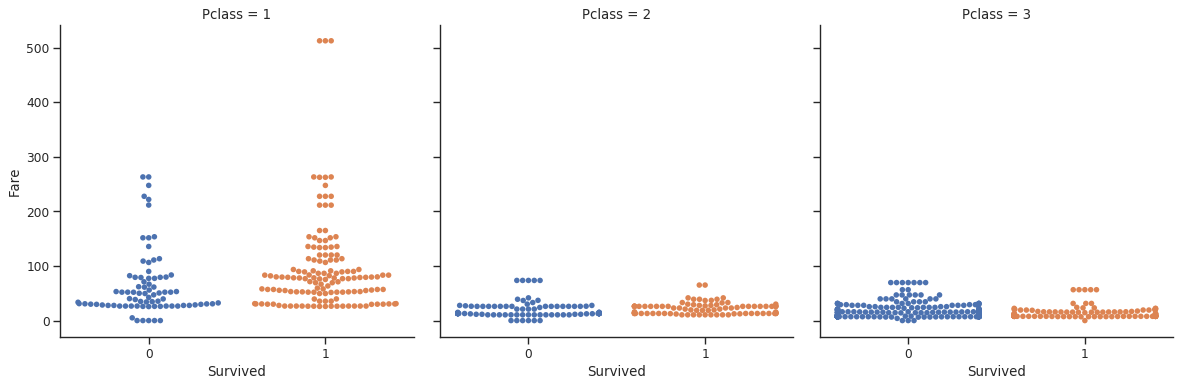

In [56]:
sns.catplot(x='Survived',y='Fare',data=data,kind='swarm',col='Pclass')
pass

First Class Fare was high and Survival Rate was High

### Joint + Age + Fare Plot

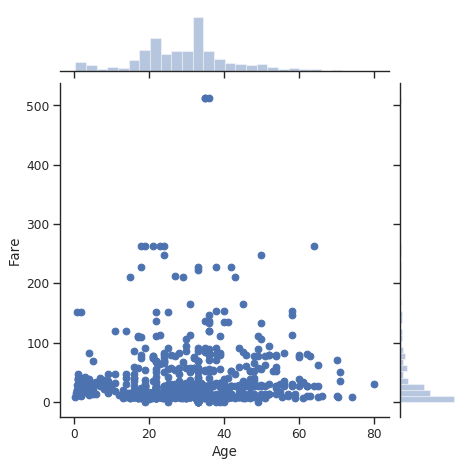

In [57]:
sns.jointplot(x='Age',y='Fare',data=data)
pass

We dont see any clear correlation between the Age and Fare.

### Joint + Age + Fare + KDE Plot

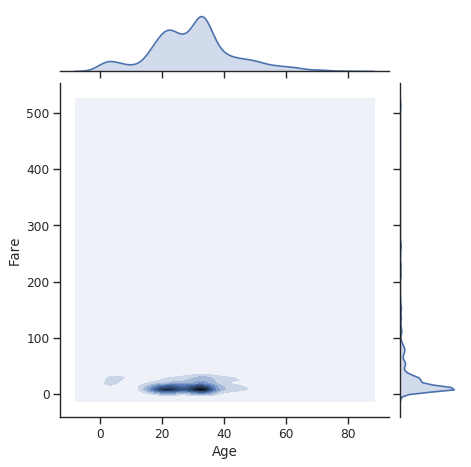

In [58]:
sns.jointplot(x='Age',y='Fare',data=data,kind='kde')
pass

Kde Plot gives us better information 

1.Most Passengers on Titanic were in the age group 20-40 

2.Fare for most passangers was in in the Range 0-40 $

### Relational + Age + Fare + Sex Hue Plot

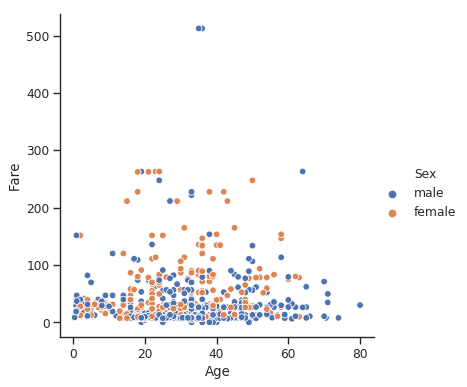

In [59]:
sns.relplot(x='Age',y='Fare',data=data,hue='Sex')
pass

Get get an impression some Female have paid more fare than male but it is not very clear from this plot

### Relation + Age + Fare + Sex Column Plot

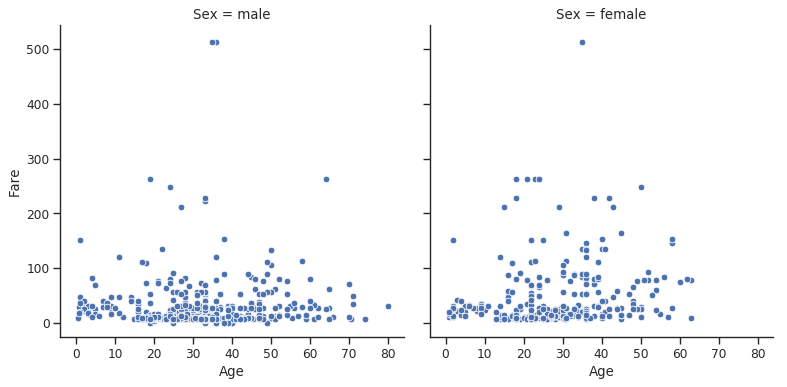

In [60]:
sns.relplot(x='Age',y='Fare',data=data,col='Sex')
pass

As we have plotted Sex in two different columns we can see more clearly that some female's paid more fare that Males in Titanic.

### Relation + Age + Fare + Sex Row + Pclass Column Plot

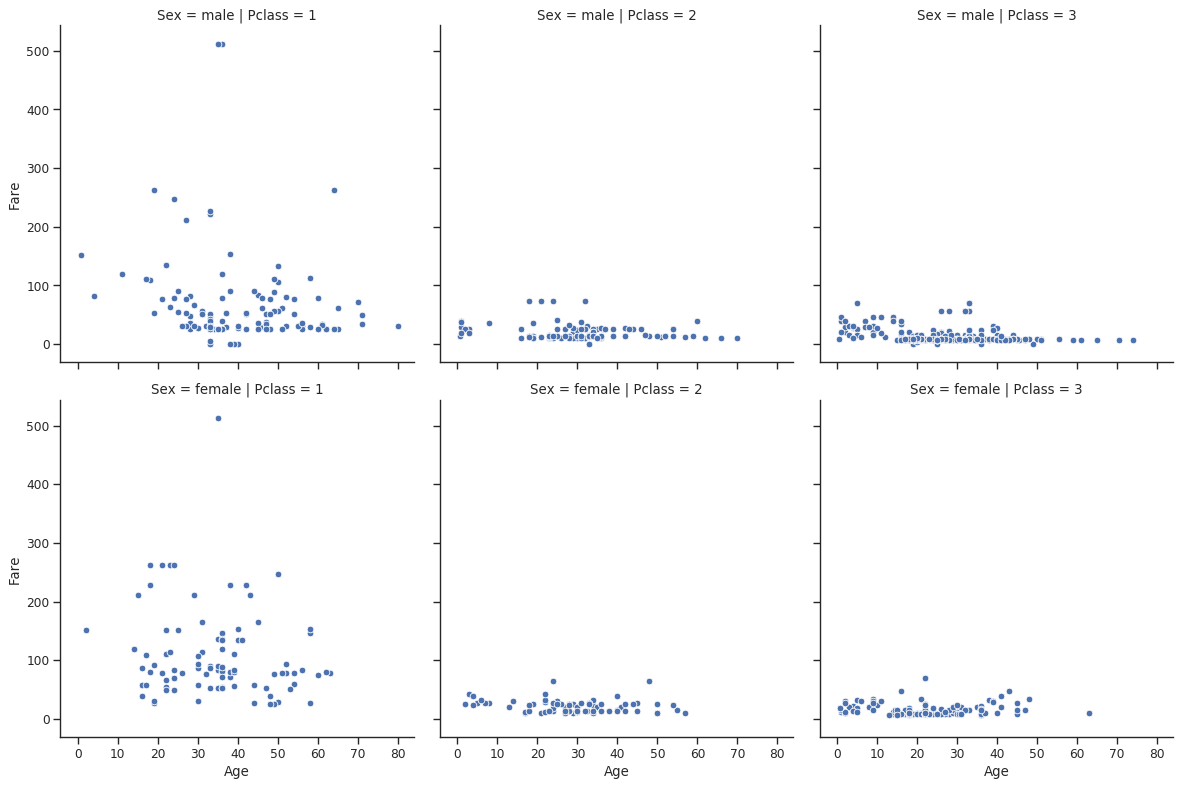

In [61]:
sns.relplot(x='Age',y='Fare',data=data,row='Sex',col='Pclass')
pass

Quite clearly we can see that female in first class paid more than males.For second and third class the difference is neglibible.

### Fare Bin

Here we will use qcut this will split the data into bins based on the number of bins requested by us.

In [62]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


We can clearly see that as the fare increased the the survival percentage increases.

In [63]:
data['Fare_Group']=0
data.loc[data['Fare']<=7.91,'Fare_Group']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_Group']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_Group']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_Group']=3

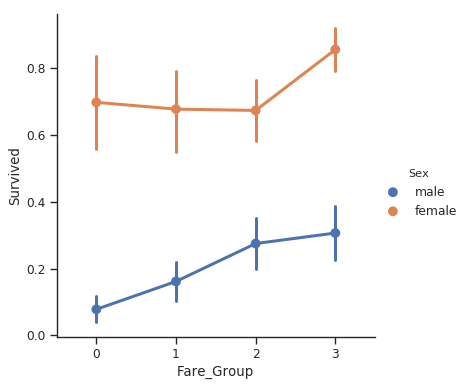

In [64]:
sns.factorplot('Fare_Group','Survived',data=data,hue='Sex')
plt.show()

So we can see that the survival rate for female remains constant for Fare_Group 0 to 2 but increases charply for group 3.

For men the survival percentage increases steadly from Fare_Group 0 to 2.Then it remains almost fame for Fare_Group 2 and 3.

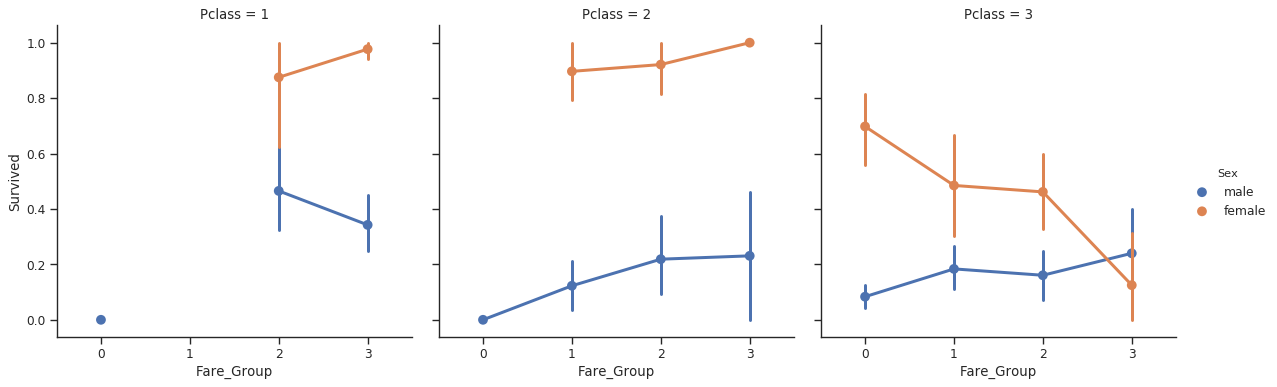

In [65]:
sns.factorplot('Fare_Group','Survived',data=data,col='Pclass',hue='Sex')
plt.show()

This plot gves us an interesting insight that in all fare groups always the percentage survival of female was greater.We cee an exception we have more male survival in Fare_group 3 when the P class is 3

## Age

In [66]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.841941638608304 Years


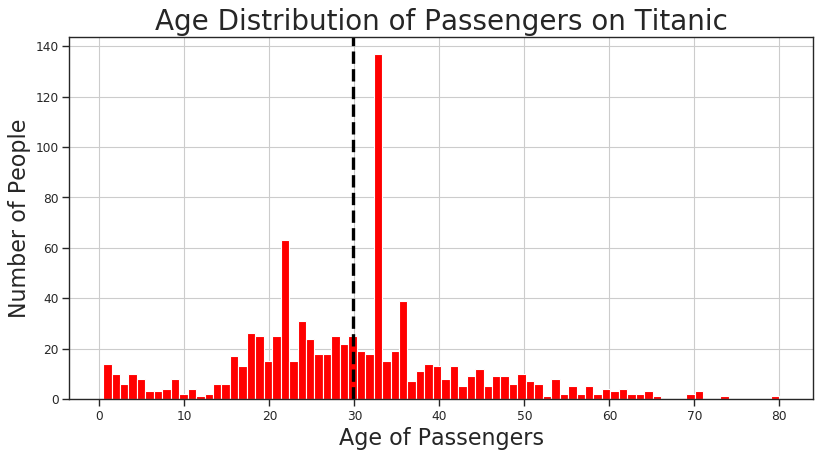

In [67]:
plt.figure(figsize=(12,6))
data[data['Age']<200000].Age.hist(bins=80,color='red')
plt.axvline(data[data['Age']<=100].Age.mean(),color='black',linestyle='dashed',linewidth=3)
plt.xlabel('Age of Passengers',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Age Distribution of Passengers on Titanic',fontsize=25)
pass

In [68]:
#print('Minumum salary for H1b1 Visa holder is:',int(data[data['PREVAILING_WAGE']<=200000].PREVAILING_WAGE.min()),'$')
print('Mean age of Passenger on Titanic:',int(data[data['Age']<=100].Age.mean()),'Years')
print('Median age of Passenger on Titanic:',int(data[data['Age']<=100].Age.median()),'Years')
#print('Maximum salary for H1b1 Visa holder is:',int(data[data['PREVAILING_WAGE']<=9000000].PREVAILING_WAGE.max()),'$')y

Mean age of Passenger on Titanic: 29 Years
Median age of Passenger on Titanic: 30 Years


### Survived By Age Distribution

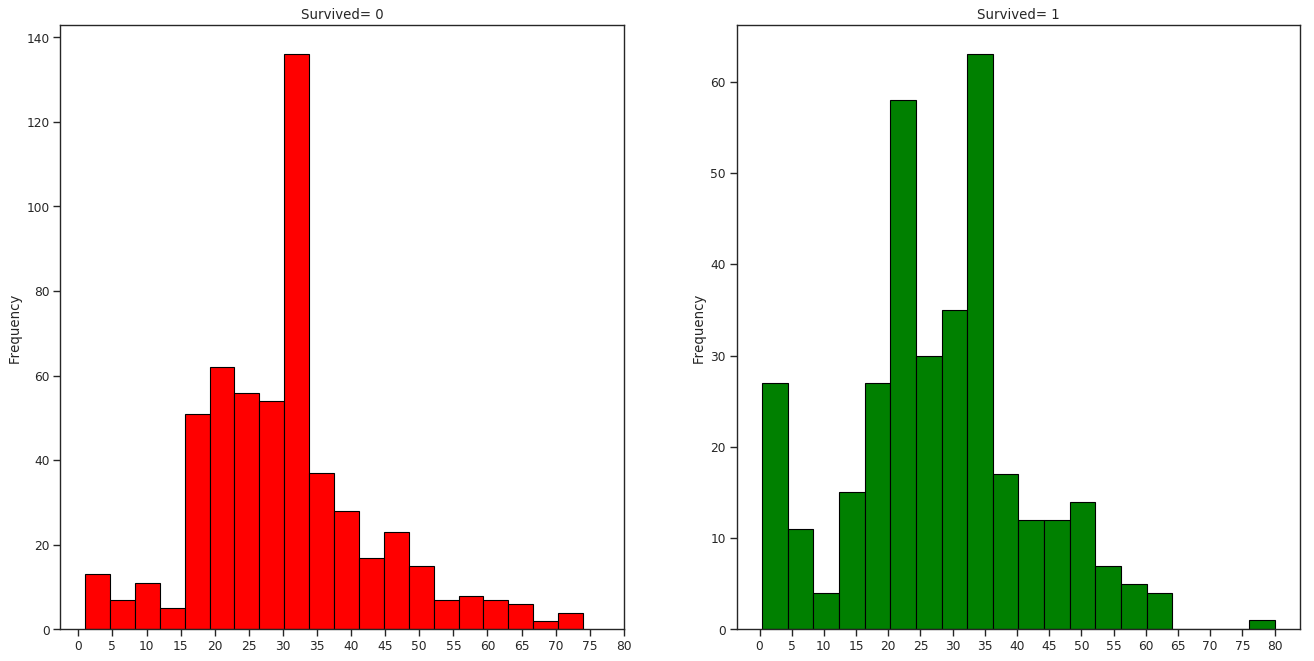

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1.Children less than 5 years survived.So again the pattern of children and women given preference when it came to rescue.

2.Most deaths happened in the age group 15-30.Most who survived were  als in the age group is 15-35.

3.The oldest person who was 80 years old survived.But many Senior Citizens in the age group 60-75 lost their lives.

### Age Binning

In case of a continous variable like Age we can get better insight by making bins of the Age data.

In [70]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Range,Fare_Group,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(-0.001, 7.91]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(31.0, 512.329]",3,2


In [71]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


We can clearly see that more people fall in the group 1 and 2 ie is 16 to 48 Age group.There were good number of people in the age group 0 to 16.

### Factor + Age Band + Survived + Pclass Plot

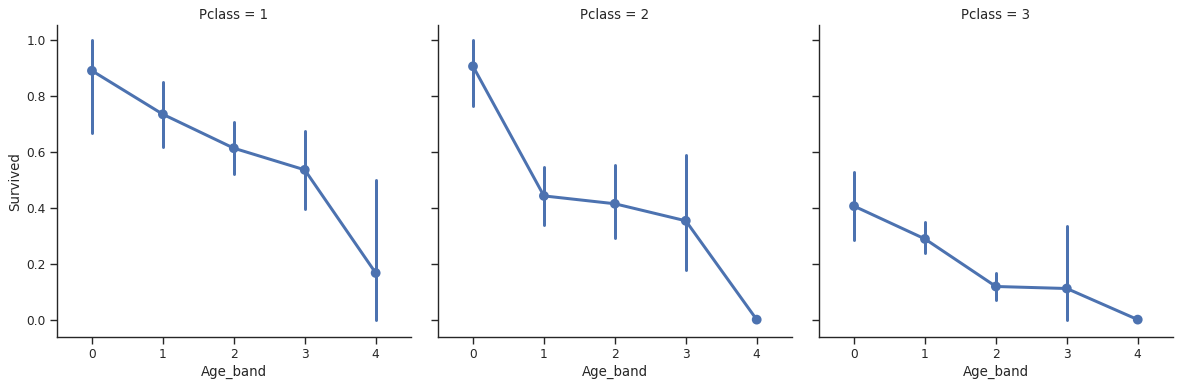

In [72]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

We can clearlly see the trend that as the age increased the chances of Surviving the Titanic tragedy decreased.

### Cat + Sex + Age + Box Plot

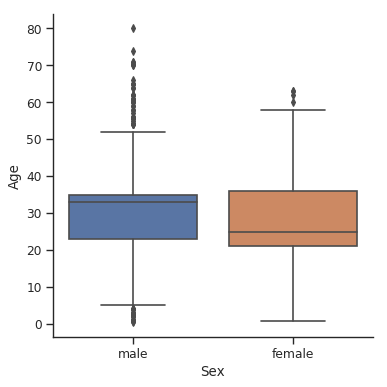

In [73]:
sns.catplot(x='Sex',y='Age',data=data,kind='box')
pass

We can see the mean age of male (29) i slightly more than females(27).The higher mean age of the males is due to more outlier in the male category.

### Cat + Sex + Age + Box + Pclass Column Plot

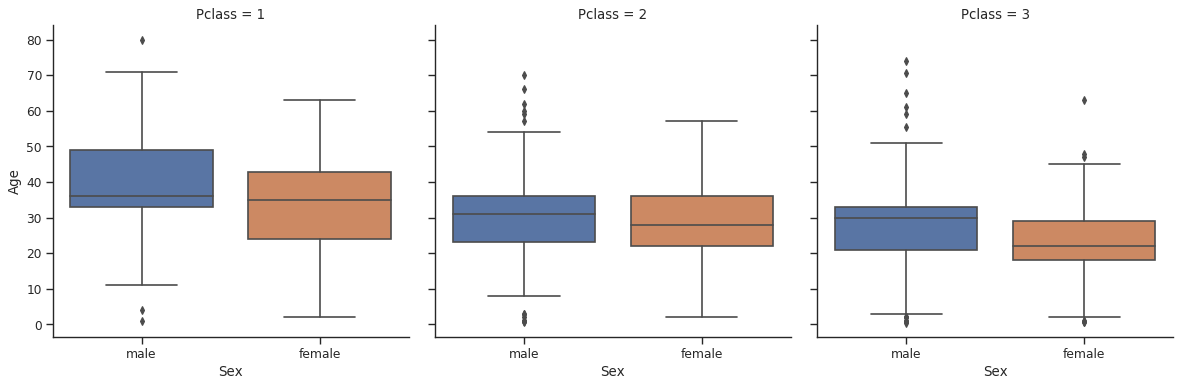

In [74]:
sns.catplot(x='Sex',y='Age',data=data,kind='box',col='Pclass')
pass

Mean age of the both genders is more in first class followed by second and third class.

This is because the tickets are more expensive in first class and only older people would be rich enough to afford it.

### Cat + Pclass + Age + Violin Plot

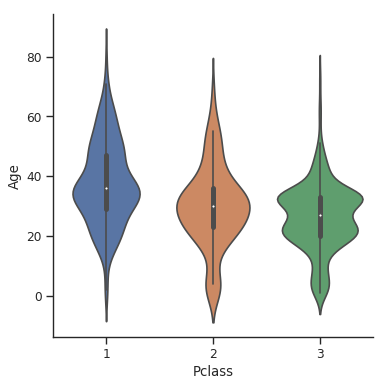

In [75]:
sns.catplot(x='Pclass',y='Age',data=data,kind='violin')
pass

Mean age in first,Second and Third class is around 37,30 and 22 respectively

### Cat + Pclass + Age + Violin + Sex Hue plot

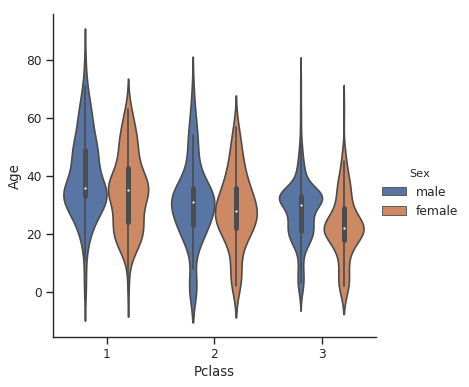

In [76]:
sns.catplot(x='Pclass',y='Age',data=data,kind='violin',hue='Sex')
pass

In all the class he age of females is lower than Males.

### Cat + Pclass + Age + Violin + Sex + Split plot

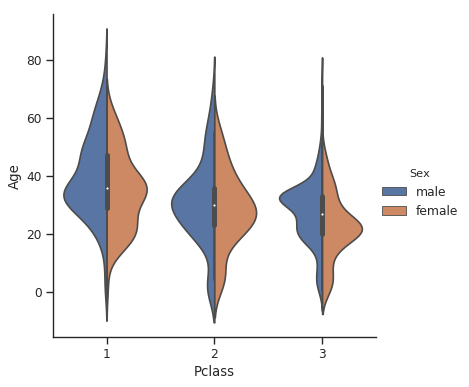

In [77]:
sns.catplot(x='Pclass',y='Age',data=data,kind='violin',hue='Sex',split=True)
pass

We have used the split option here which makes the plot mmore elegant.

## Sibling and Spouse

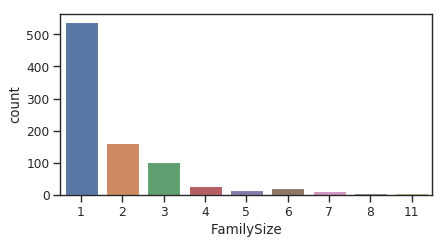

In [78]:
data["FamilySize"] = data["SibSp"] + data["Parch"]+1
#titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
#data["FamilySize"].value_counts())
sns.countplot('FamilySize',data=data)
pass

We can see that most people on Titanic travelled alone.

### Bar and Factor plot SibSp Survived

In [79]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


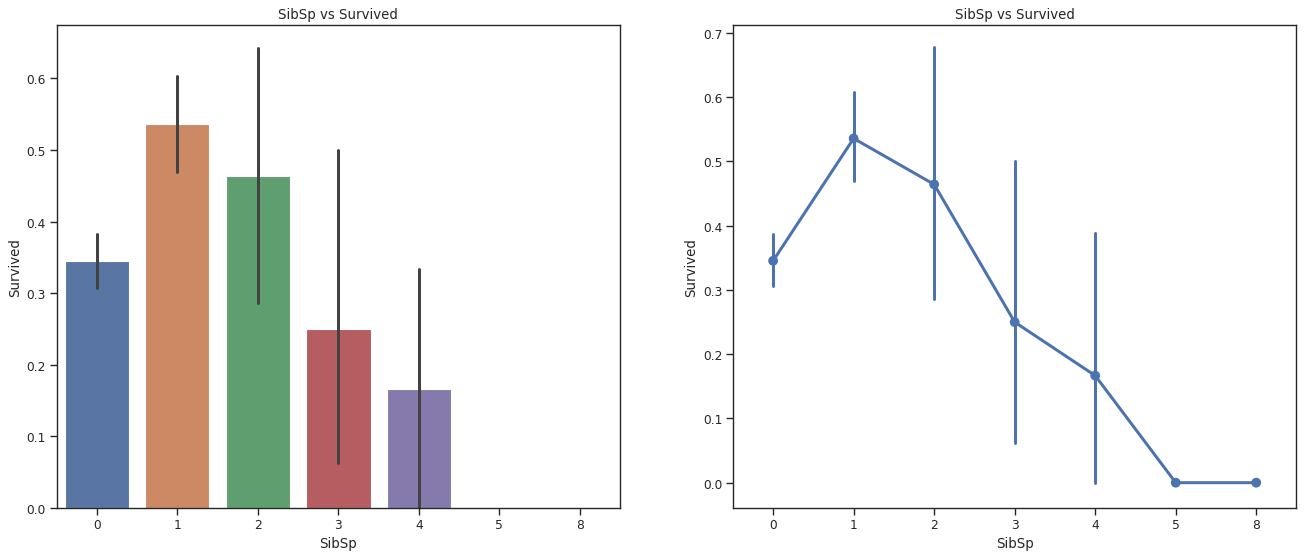

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

1.If people had some one with them it inclreased there chance of survival when SibSp was 1 & 2 .This could be because these one family member would have helped other to survive.Also they must have travelled in 1st and 2nd class.

2.If we note when SibSp goes beyond 3 then the survival percentage decreases.This is because the people with SibSp greater than 3 travelled in 3rd class.

# Parents and Children (Parch)

In [81]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


We can see that Larger Families travelled in 3rd Class

### Bar and Factor Plot of Survived Based on Parch

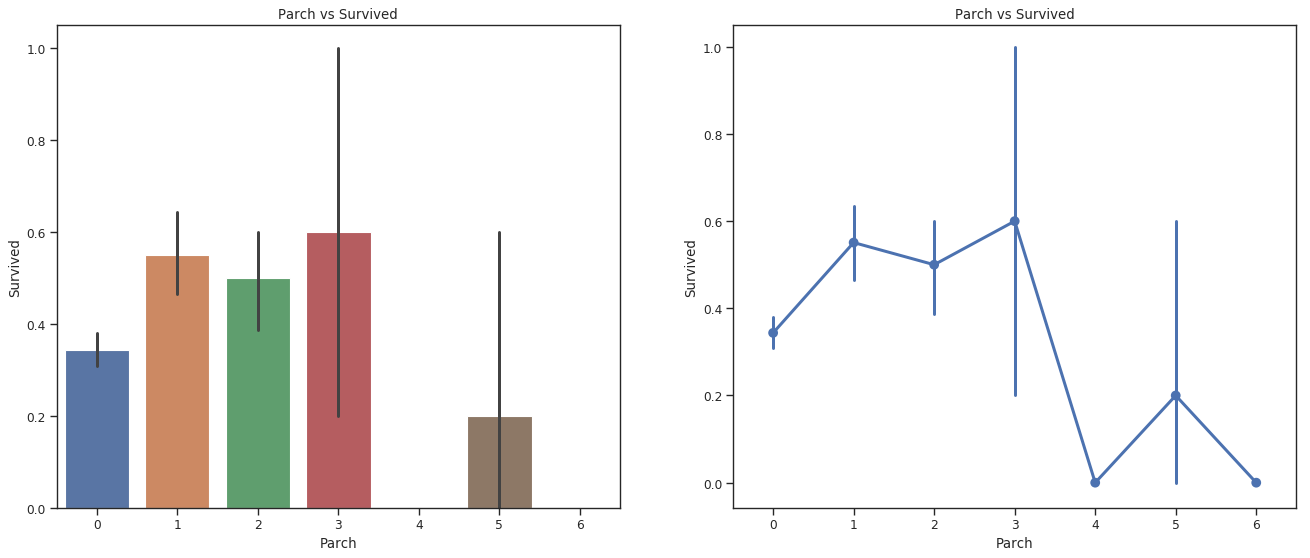

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

1.We can see that people who were alone had less chance of survival.There are two reason for this.They mostly travelled in 3rd class and there was no one along with them to help them out.

2.Survival rate was higher for Parch 1 to 3 and was very low for Parch 4 to 6.This is because famalies with higher Parch travelled in 3rd class.

# Embarked

### Value Counts

In [83]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

More people boarded from S ( Southampton) followed by C(Cherbourg) and then Q(Queenstown)

### Count Plot 

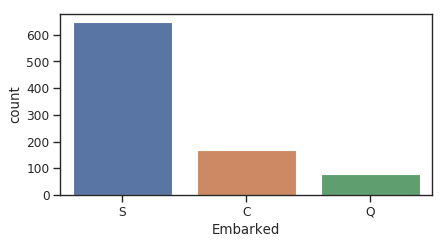

In [84]:
sns.countplot('Embarked',data=data)
pass

### Absoute Value of Survived

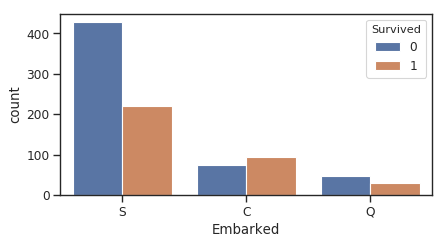

In [85]:
sns.countplot('Embarked',data=data,hue='Survived')
pass

Around 200 people from Southampton survived. Followed by around 90 from Cherbourg and 30 from Queenstown.

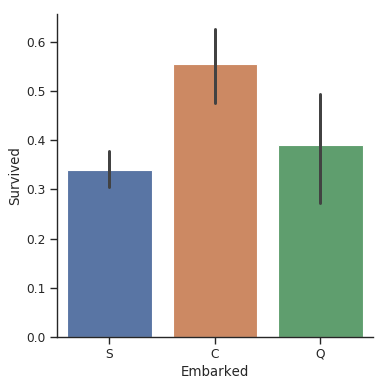

In [86]:
sns.catplot(x="Embarked", y="Survived",kind='bar',data=data);

We can see that close to 55% People from Cherbourg survived .35 % + people from Queenstown survived.Less than 35 % of the people from Southampton survived.

### Cat + Embarked + Fare + Bar + Sex Plot

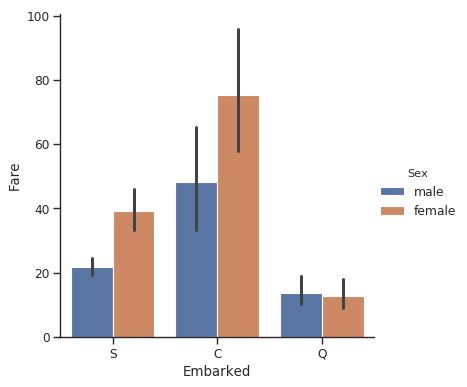

In [87]:
sns.catplot(x="Embarked", y="Fare",kind='bar', hue ="Sex", data=data);
pass

Till now we though more female survived compared to males.But if we look carefully at the above curve more males from Queenstown survived.So the boarding location of Queenstown is an outlier.

### Percentage Survived by Port

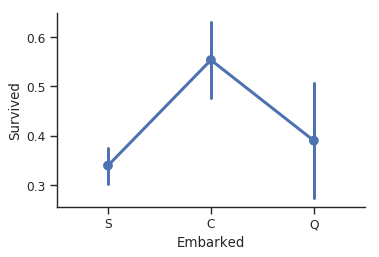

In [88]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

55 % the passengers from port C Survived compared to 40% and 35% in port Q and S Respectively.

### Count Plot Based On Embarked,Sex and Class

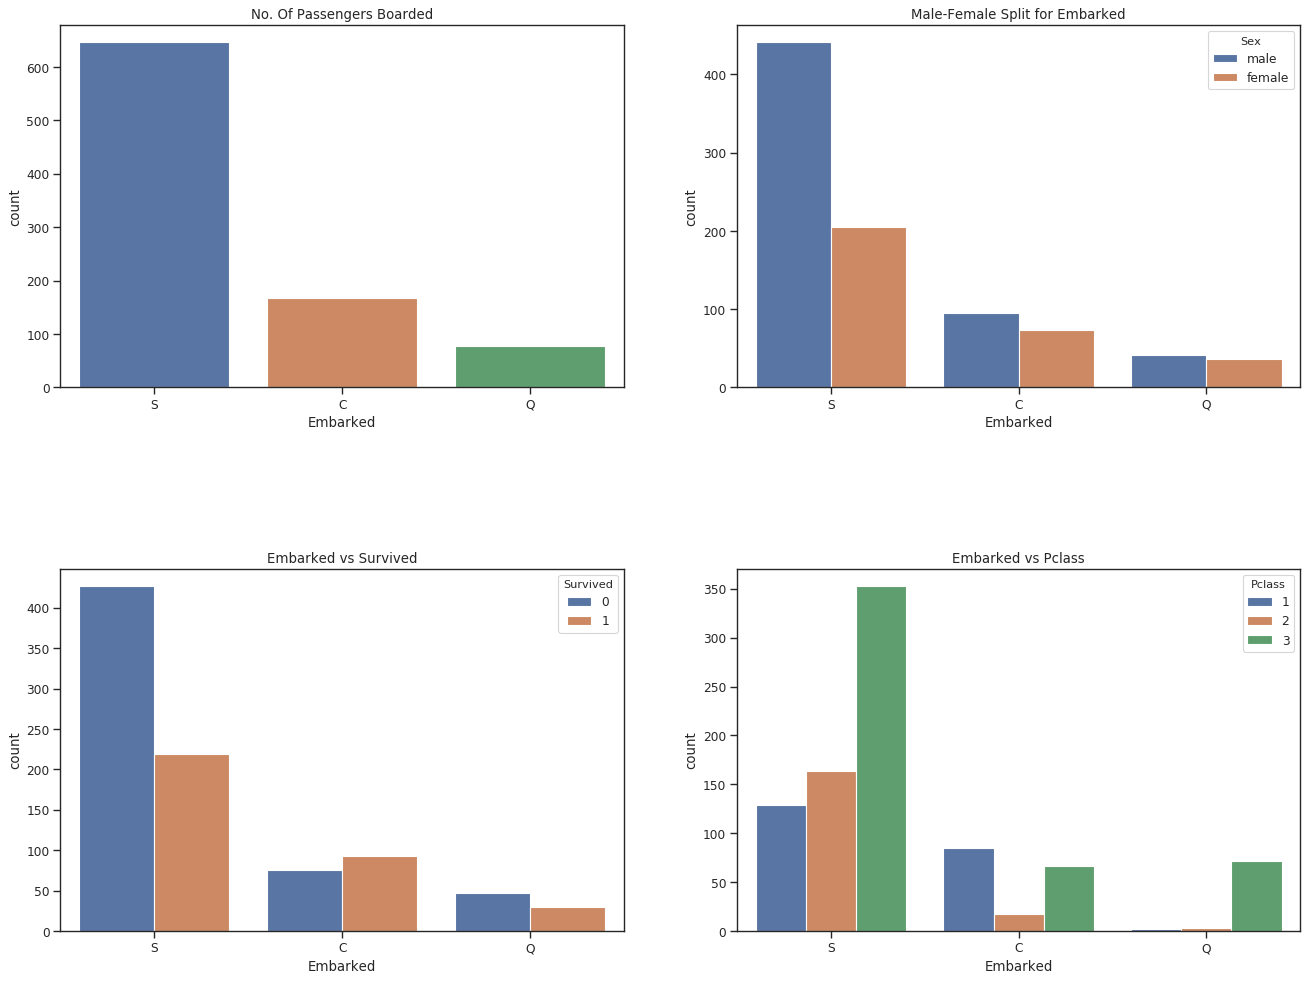

In [89]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

We can observe following things 

1.Majority of passengers boarded from S.

2.In all the port more male boarded compared to females.Only in port Q the difference in number of male and female was very low.

3.For people from S survived but more people also boarded from there.Port C is an outlier where number of survived was more than the one's who died.

4.Port Q had very few passangers in 2nd class.There were more passengers belonging to 1st class at port C.This is also reason for higher survival rate for passengers from port C. Money and Class proved to be important factor between Life and Death.

### Factor Plot based on Class,Survival,Sex and Embarked

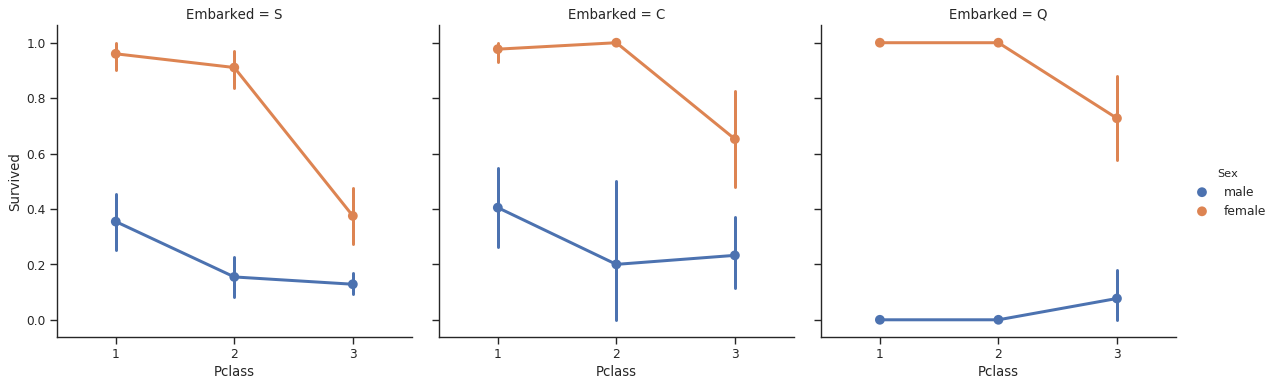

In [90]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

We Observe Following things 

1.Female in 1st and 2nd class has close to 100 % Survival rate.Survival rate in 3rd class was lower than 70% for female.For S less than 40% female survived.This is because more people who boarded at S were in 3rd Class.

2.Less than 40% Men survived in all the three classes.Port Q qas worst for men as the survival rate was less than 15% 

# Who

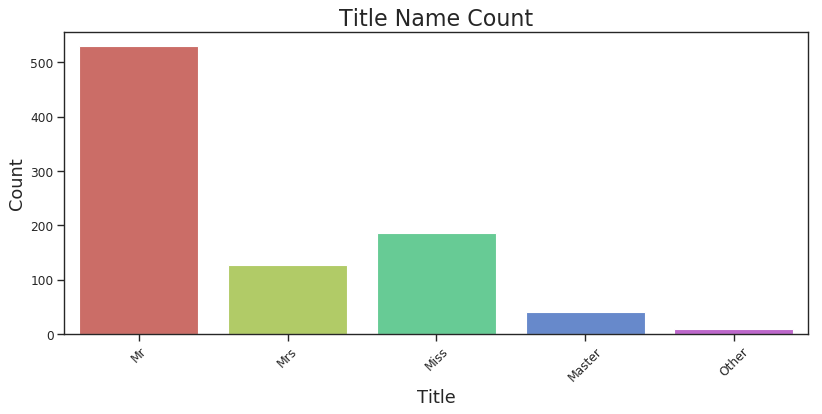

In [91]:
import re
#GettingLooking the prefix of all Passengers
#data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=data, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

People were addresses as Mr,Mrs,Miss,Master,Rev,Dr,Major,Mlle and Col on the titanic

In [92]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
data['Title']=data.Title.map(Title_Dictionary)

Chance of Survival based on Titles:
Title
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Name: Survived, dtype: float64


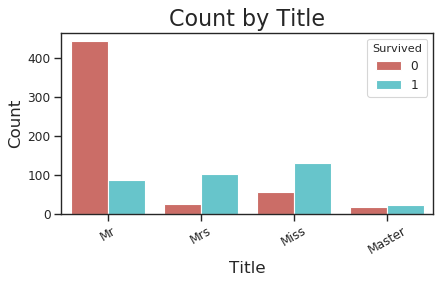

In [93]:
print('Chance of Survival based on Titles:')
print(data.groupby("Title")["Survived"].mean())
#plt.figure(figsize(12,5))
sns.countplot(x='Title',data=data,palette='hls',hue='Survived')
plt.xlabel('Title',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count by Title',fontsize=20)
plt.xticks(rotation=30)
plt.show()

# 2.Feature Engineering 

1.We have imputed the missing values for Age and Embarked Features.

2.We have created new features like Title,Age_band and Fare_Group 

3.Now we need to convert the string to numeric values for the features Sex,Embarked and Title

4.We would be troping the features which wont be important for survival.

### Converting String to Numerical Values

In [94]:
data['Sex'] = data['Sex'].astype(str)
data['Embarked'] = data['Embarked'].astype(str)
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Range,Fare_Group,Age_band,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,"(-0.001, 7.91]",0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,"(31.0, 512.329]",3,2,2


The features Sex and Embarked were in integer format.We first converted them into string.Then we have converted the String values into Numeric values.

### Dropping Unwanted Columns

**Name:** We will be dropping the feature name as it wont be any use for us to predict the survival

**Age:** We will be using the Age as we have created Age_band which we can use for our model

**Ticket:** We will be dropping feature ticket as it is not useful in making prediction 

**Fare:** We will be dropping fare and making use of the newly created feature Fare_Group

**Cabin:** We will be dropping this deature as this feature has lot of missing values

**Fare_range:** We will be making use of Fare_Group feature 

**PassengerId:** This feature will be of no use in predicting survival.


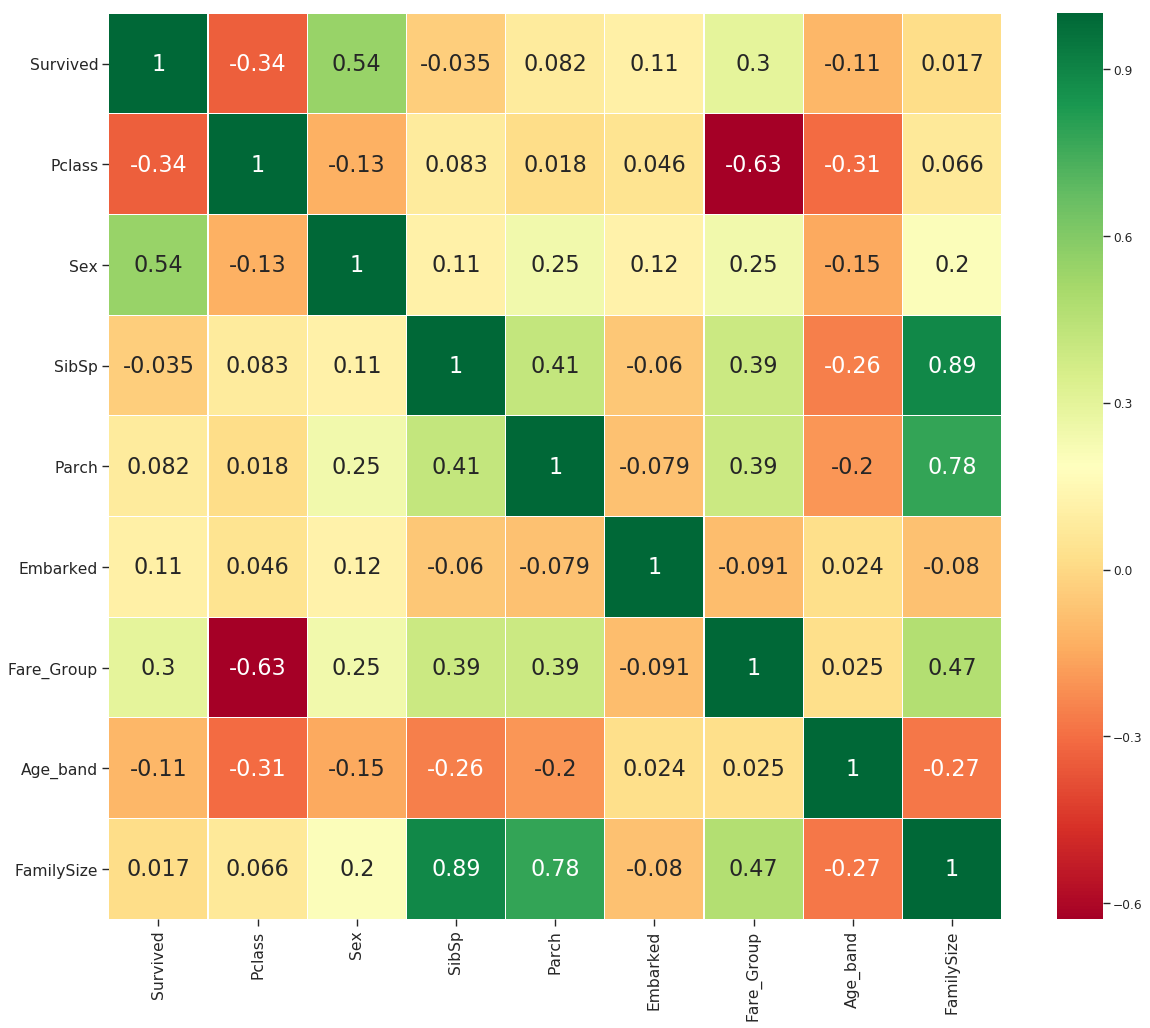

In [95]:
df=data.copy()
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the Correlation plot we can see that SibSp and Parch aare well correlated Family Size.We can drop SibSp and Parch and keep only family size.

In [96]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Embarked,Title,Fare_Group,Age_band,FamilySize
0,0,3,0,0,0,0,1,2
1,1,1,1,1,1,3,2,2
2,1,3,1,0,2,1,1,1
3,1,1,1,0,1,3,2,2
4,0,3,0,0,0,1,2,1


### Dropping Missing Values 

In [97]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Embarked      0
Title         9
Fare_Group    0
Age_band      0
FamilySize    0
dtype: int64

There are nine missing values in the title which we will delete.We could have also imputed the missing values considering their Age and Sex.But here i am deleting as there are only 9 rows of missing data.

In [98]:
df = df.dropna()
#df.shape

### Pair Plot

<Figure size 960x480 with 0 Axes>

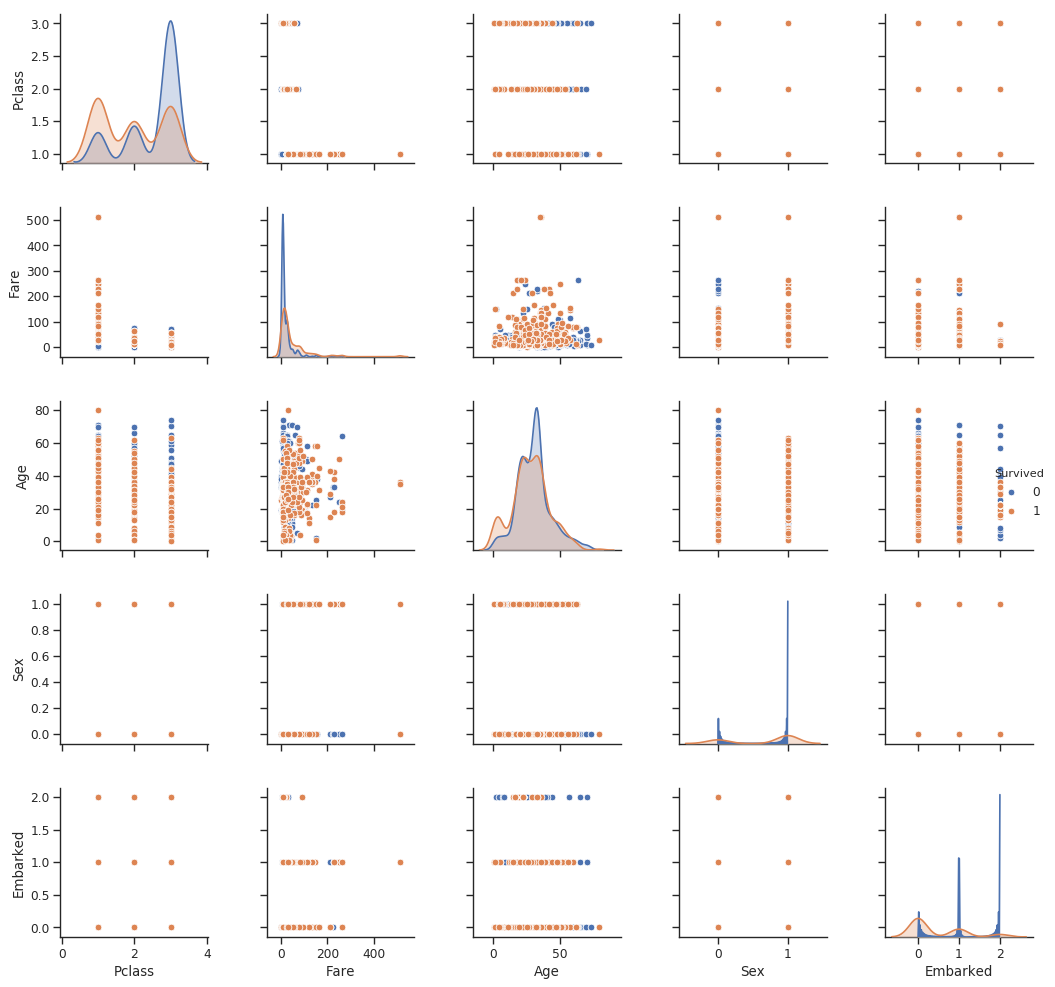

In [99]:
plt.figure(figsize=(12,6))
#sns.pairplot(data,vars=['Pclass','Sex','Embarked','Title','Fare_Group','Age_band','FamilySize','Age','Fare'],hue='Survived')
sns.pairplot(data,vars=['Pclass','Fare','Age','Sex','Embarked'],hue='Survived')
plt.tight_layout(),
plt.ioff()
pass

Pair plot can show us if our data shows clear seperation of the predicted variable.In our case the predicted variable is Survived from the pair plot we can see that there is no clear seperation of the survived.So our machine learning model wont have higher accuracy unless we do good amount of feature engineering and hyper parameter tuning.

# 3.Model Build

We have explored the data to a great extent.Now we can use machine learning techiniques to predict who survived or died on the Titanc.We can use different algorithms to predict this.Also we will try to quantify which algorithm gives us the highest accuracy.

### Importing Modules

In [100]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### Creating Matrix of Features

In [101]:
X = df.drop(labels='Survived',axis=1)
y = df['Survived']

### Test Train Split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 1234,stratify=y)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 793
Test Set: 89
Training labels: 793
Test labels: 89


### 1.Linear Support Vector Machine(Linear-SVM)

In [103]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for linear SVM is 0.8426966292134831


### 2.Radial SVM (rbf-SVM)

In [104]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,y_test))

Accuracy for rbf SVM is  0.8426966292134831


### 3.Decision Tree

In [105]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Decision Tree is 0.8314606741573034


### 4.Random Forest

In [106]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Random Forests is 0.8202247191011236


### 5.Gaussian Naive Bayes 

In [107]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the Naive Bayes is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the Naive Bayes is 0.797752808988764


### 6.Logistic Regression 

In [108]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Logistic Regression is 0.7865168539325843


### 7.K Nearest Neighbours(KNN)

In [109]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the KNN is 0.797752808988764


### K-Value Based on Model Error

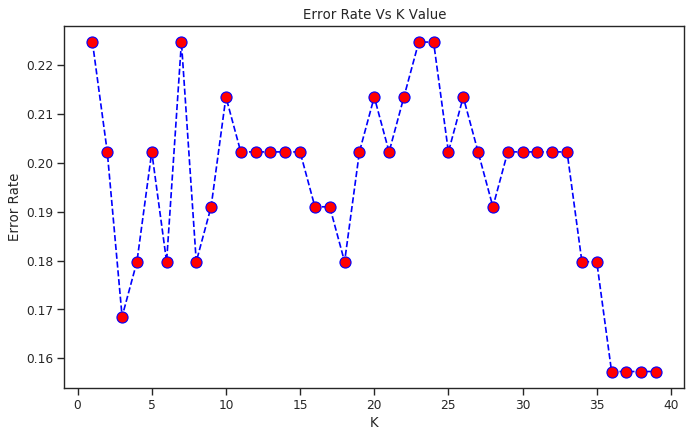

In [110]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


We can see that around K value 35 the error rate is the lowest,So we can choose 35 as the optimum value of k to keep the model Error low

### K-Value Based on Model Accuracy

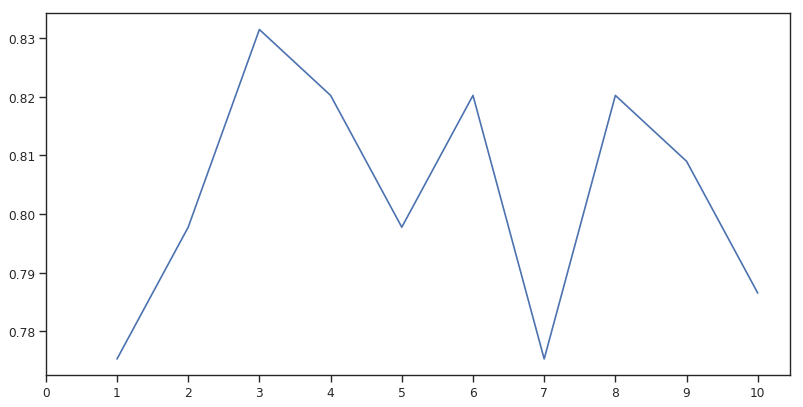

Accuracies for different values of n are: [0.7752809  0.79775281 0.83146067 0.82022472 0.79775281 0.82022472
 0.7752809  0.82022472 0.80898876 0.78651685] with the max value as  0.8314606741573034


In [111]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

So we can deside the Optimum value of K Based on Error and Accuracy. 

### K Fold Cross Validation

In [112]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Decision Tree','Random Forest','Naive Bayes','Logistic Regression','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),GaussianNB(),LogisticRegression(),KNeighborsClassifier(n_neighbors=9)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.796974,0.041399
Radial Svm,0.831027,0.034375
Decision Tree,0.806141,0.031749
Random Forest,0.817467,0.041345
Naive Bayes,0.806167,0.037577
Logistic Regression,0.806078,0.027785
KNN,0.817480,0.037268


### Box Plot Model Accuracy

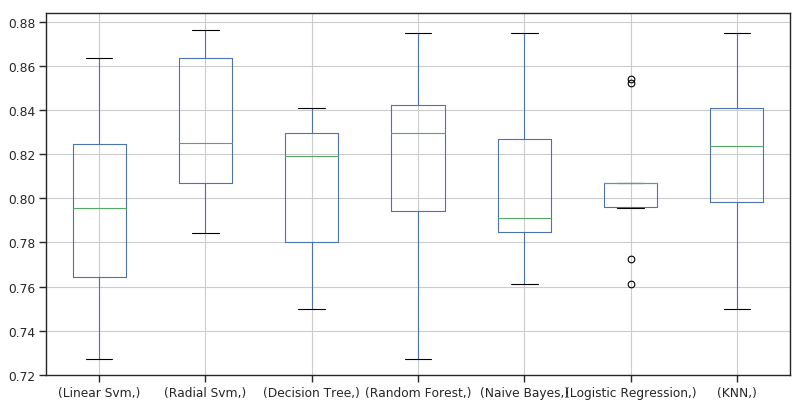

In [113]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
pass

Radial SVM gives the highest accuracy after applying k fold cross validation.But Logistic regression has the lowest standard deviation for accuracy.

### Bar Plot of Accuracy

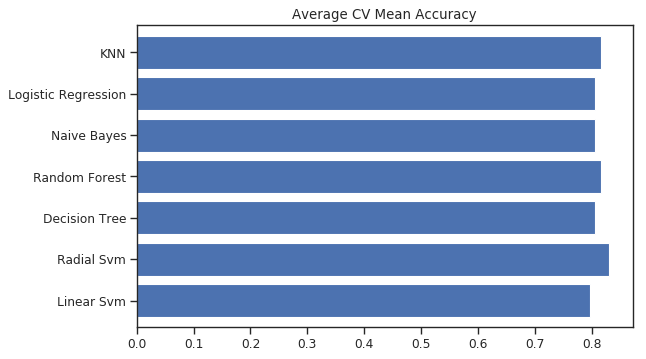

In [114]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

We can clearly see from the above plot that Radial SVM has given us the highest accuracy

### Confusion Matrix

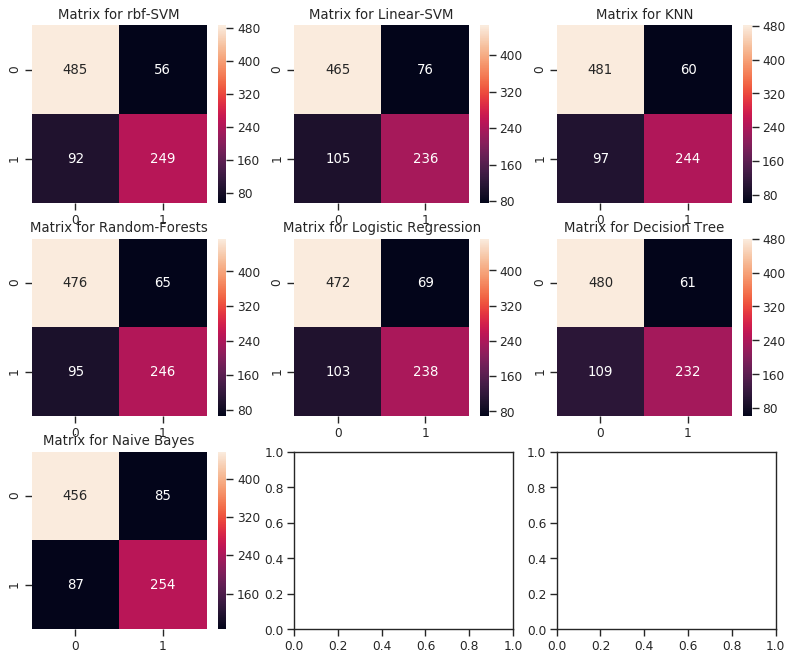

In [115]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Based on the confusion matrix we can decide the best model based on our requirements.If we want to have make a decision based on the Precision,Recall and F1 Score then we need to print the classification matrix too.

# 4.Feature Importance 

### AdaBoost 

In [116]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8276767676767676


### Stochastic Gradient Descent

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8152272727272727


### XGBoost

In [118]:
X1 = X.copy()
X1['Title'] = X1['Title'].astype(int)
#X1.dtypes

In [119]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X1,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8209090909090909


### Plotting important Features

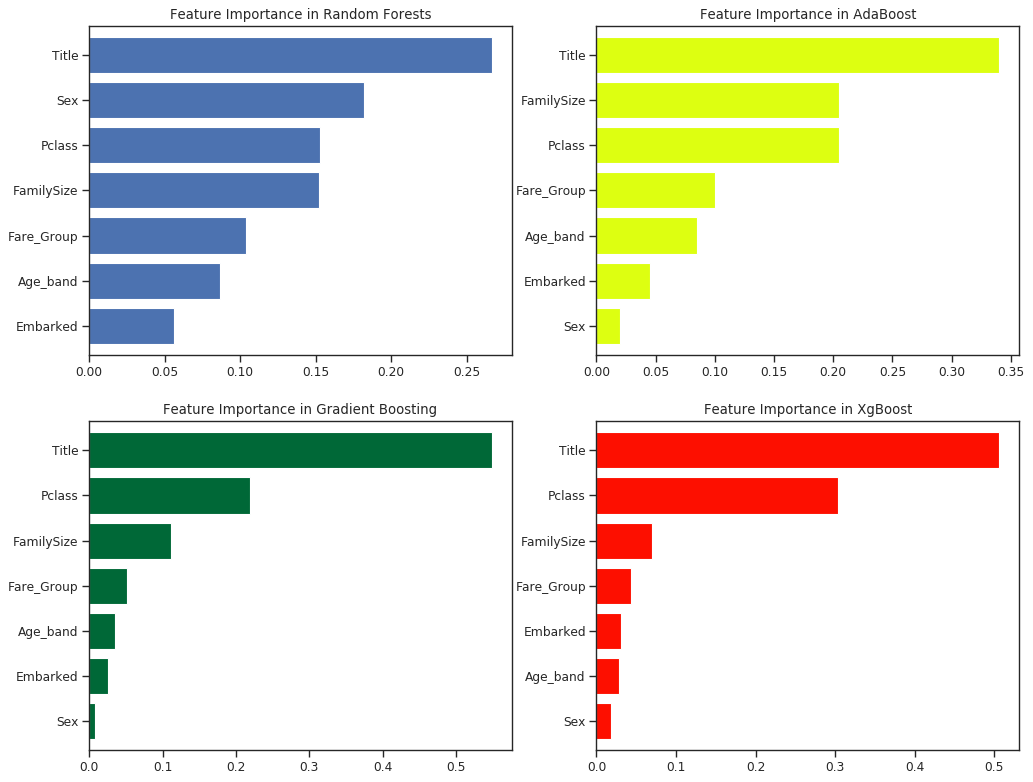

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X1,y)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X1,y)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X1,y)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X1,y)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X1,y)
plt.show()

From the feature importance plots we can see that all the four algorithms rate Title as most important feature.Suprisingly only Random Forest considers Sex as important parameter.Title was a feature which we had done feaure engineering on.Also we can understand that title and Sex are correlated parameter.Title has more categories so it is a better feature to consider in out model.If someone wants to experiment further then we can consider droping the feature Sex.

# 5.Conclusion:

1.We have filled up missing values for Age,Embrarked and Dropped the feature Cabin.

1.There were more male(65%) than female(35%) on Titanic.But during time of rescue preference was given to Female and children.Only 38% People ended up surviving on Titanic.75% Female and 18% Male survived.

2.Most passengers(491) travelled in third class.Passengers from first class were given preference while carrying out the rescue.55%,20.7% and 24.2% people travelled in 3rd,2nd and 1st class respectivel.63%,47% & 24% of the passengers survived in 1st,2nd and 3rd Pclass respectively.

3.We can see the distribution of fare was higher in 1st class from 0-300 dollars and some people even paid 500 dollars.For 2nd class the distrubution of fare is more between 0-40 dollars and there are some passangers who paid in the reange 60-80 dollars.Most passangers in 3rd class paid between 0-30 dollars for few people fare was higher reaching upto 70 dollars.Woemn travelling in 1st class were charged more compared to men.

4.Most Passengers on Titanic were in the age group 20-40.Fare for most passangers was in in the Range 0-40 $.In some cases Fare for Female was more than Males.

5.Children less than 5 years survived.So again the pattern of children and women given preference when it came to rescue.Most deaths happened in the age group 15-30.Most who survived were als in the age group is 15-35.The oldest person who was 80 years old survived.But many Senior Citizens in the age group 60-75 lost their lives.Mean age in first,Second and Third class is around 37,30 and 22 respectively

6.most people on Titanic travelled alone.f people had some one with them it increased there chance of survival when SibSp was 1 & 2 .This could be because these one family member would have helped other to survive.Also they must have travelled in 1st and 2nd class.If we note when SibSp goes beyond 3 then the survival percentage decreases.This is because the people with SibSp greater than 3 travelled in 3rd class.

7.We can see that people who were alone had less chance of survival.There are two reason for this.They mostly travelled in 3rd class and there was no one along with them to help them out.Survival rate was higher for Parch 1 to 3 and was very low for Parch 4 to 6.This is because famalies with higher Parch travelled in 3rd class.

8.More people boarded from S ( Southampton) followed by C(Cherbourg) and then Q(Queenstown).Around 200 people from Southampton survived. Followed by around 90 from Cherbourg and 30 from Queenstown.We can see that close to 55% People from Cherbourg survived.35 %  people from Queenstown survived.Less than 35 % of the people from Southampton survived.

9.We have build various machine learning models and rated them based on their accuracy.

10.We have used boosting techiniques and found out the important features in the dataset.


# TO BE CONTINUED

# 6.Miscellaneous

## a) Working with Strings

In [121]:
# we will add * in front and after the name philip.
name='Titanic'   #Name is defined as string  
#there are 6 letters in the name philip.We can use string center method to put star in front and behind the word philip 
name.center(8,'*')

'Titanic*'

In [122]:
name.center(10,'*')

'*Titanic**'

In [123]:
name.center(8,'!')

'Titanic!'

We will put four * in front and end of the string by taking name as input from user 

In [124]:
name='Ship'
#The number of letter in name is calculated by using length function and 8 is added to add 4 stars before and end of the string
print(name.center(len(name)+8,'*'))

****Ship****


**1.2) String Concatenation** :It is used to combine two strings 

In [125]:
# We will be combaining the First and the Last Name 
first_name='Leonardo'
last_name='DiCaprio'
full_name=first_name+last_name
print(full_name)

LeonardoDiCaprio


In [126]:
# We will add space between the two names 
full_name=first_name+' ' +last_name
print(full_name)

Leonardo DiCaprio


In [127]:
print(first_name +'3')
print(first_name+str(3))
print(first_name*3)

Leonardo3
Leonardo3
LeonardoLeonardoLeonardo


## b.Printing the version of the Python Modules used 

In [128]:
# Importing the modules for which we want to find out the Version
import matplotlib
import sklearn
import scipy 
import seaborn as sns
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [129]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
matplotlib: 3.0.3
sklearn: 0.21.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.25.0
numpy: 1.17.0
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


## c.Printing emojis with Python

In [130]:
# Link for getting the list of the Unicode emoji characters and sequences, with images from different vendors, CLDR name, date, source, and keywords - https://unicode.org/emoji/charts/full-emoji-list.html
# For the codes obtained from this website replace + with 000 and put \ in front of the code as dhown below 
#U+1F600 has to be represented as \U000F600 in the code 
print('\U0001F600')  #Grimming face emoji
print('\U0001F600','\U0001F600') # Printing the Emoji twice 
print('\U0001F600','\U0001F602','\U0001F643') # Printing three different emojis

😀
😀 😀
😀 😂 🙃


## d.Solving linear equation with Numpy 
X1+X2=2200

1.5X1+4X2=5050

Find the values of X1 and X2

In [131]:
A=np.array([[1,1],[1.5,4]])
b=np.array([2200,5050])
np.linalg.solve(A,b)

array([1500.,  700.])

X1=1500 & X2=700

## f)Pandas


**6.1 Importing the data with Pandas**

In [132]:
import pandas as pd
data=pd.read_csv('../input/train.csv')

**6.2 Displaying the data**

**Viewing head of the data**

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Viewing the tail of the data**

In [134]:
data.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**6.3 Finding missing values**

In [135]:
Total=data.isnull().sum().sort_values(ascending=False)
Percent=round(Total/len(data)*100,2)
pd.concat([Total,Percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Cabin and Age Column have missing data.Age can be replaced with mean age.

**6.4 Crosstab**

In [136]:
pd.crosstab(data.Survived,data.Pclass,margins=True).style.background_gradient(cmap='gist_rainbow') 
#Margins=True gives us the All column values that is sum of values colums

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


We we can see that more people survived in the First class cabin and least survived in third class cabin.It clearly shows the rescue efferts were baised based on the class of the travellers.

**6.5 Concanat ** to get  P Class details 

In [137]:
percent = pd.DataFrame(round(data.Pclass.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with the #
total = pd.DataFrame(data.Pclass.value_counts(dropna=False))
## concating percent and total dataframe

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
3,491,55.11
1,216,24.24
2,184,20.65


We can see that 55 % of the people on Titanic travelled in Pclass 3

**6.6 Statistics characteristics of the data **

In [138]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistic charasteristic of only one feature Age

In [139]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**6.7 Finding out people with age greater than 70 in the dataset**

In [140]:
data[data['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


We can see than five people over age of 70 travelled on the Fatal Ship.

**6.8 Unique values of a Feature**

In [141]:
data['Pclass'].unique()

array([3, 1, 2])

There were three classes on the Ship 1,2,3.Elite Class is represented by 1.

In [142]:
data[data['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


This way we can get the information on all the people you travelled 1st Class on the Titanic.

In [143]:
data[data['Pclass']==1].count()

PassengerId    216
Survived       216
Pclass         216
Name           216
Sex            216
Age            186
SibSp          216
Parch          216
Ticket         216
Fare           216
Cabin          176
Embarked       214
dtype: int64

**6.9 Finding out the Family Size**

In [144]:
# Create a family size variable including the passenger themselve
data["FamilySize"] = data["SibSp"] + data["Parch"]+1
#titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
print(data["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


Most Passengers on Board Titanic were travelling Alone.

**6.10 Group by**

In [145]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


62 % of first class,47 % of second class and 24 % of the thrid class of passangers survived.

**6.11 Data types**

In [146]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
dtype: object

1. **6.12 Viewing the data randomly**

In [147]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S,5
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,1
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,1
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,3
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q,1


In [148]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

# TO BE CONTINUED